# Set UP

In [1]:
import pandas as pd
import os
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msno
import numpy as np

#always remember your magic function if using Jupyter
%matplotlib inline

pd.set_option('display.max_rows',30)
os.chdir('/Users/alexandrejacqueline/Data_Science/P3')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Fonctions

In [3]:
def rmissingvaluecol(dff, threshold):
    l = []
    l = list(dff.drop(dff.loc[:,list((100*(dff.isnull().sum()/len(dff.index)) >= threshold))].columns, 1).columns.values)
    print("# Columns having more than %s percent missing values: "%threshold, (dff.shape[1] - len(l)))
    print("Columns:\n", list(set(list((dff.columns.values))) - set(l)))
    print(len(l))
    return l


def missing(dff):
    print (round((dff.isnull().sum() * 100/ len(dff)),2).sort_values(ascending=False))
    
def plot(col):
    fig, ax = plt.subplots()
    ax.plot(col)
    plt.show()
    
#https://stackoverflow.com/questions/55567706/plot-all-pandas-dataframe-columns-separatel

def plot(col):
 
    fig, ax = plt.subplots()
    ax.plot(col)
    plt.show()
    
def Box_plots(df):
    plt.figure(figsize=(10, 4))
    plt.title("Box Plot")
    sns.boxplot(df)
    plt.show()
    
def dist_plots(df):
    plt.figure(figsize=(10, 4))
    sns.distplot(df)
    plt.title("Distribution plot")
    sns.despine()
    plt.show()

def hist_plots(df):
    plt.figure(figsize=(10, 4))
    plt.hist(df)
    plt.title("Histogram Plot")
    plt.show()
    
def qq_plots(df):
    plt.figure(figsize=(10, 4))
    qqplot(df,line='s')
    plt.title("Normal QQPlot")
    plt.show()
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
'''
Cette fonction donne des informations pour aider à décider quelle feature on doit conserver, dans le cas où
on a 2 features qui semblent correspondre à la même notion

Elle remonte 3 informations :
% de cas où la valeur de la colonne 1 est renseignée, mais pas la 2
% de cas où la valeur de la colonne 2 est renseignée, mais pas la 1
% de cas où les valeurs de la colonne 1 et 2 sont renseignées toutes les deux

'''

def compare_na(df, col1, col2):
    num_rows, num_cols = df.shape
    
    col1notnull_col2null = round ( ( ( ( df[ (df[col1].notnull()) & ( df[col2].isna() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    col2notnull_col1null = round ( ( ( ( df[ (df[col2].notnull()) & ( df[col1].isna() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    col1notnull_col2notnull = round ( ( ( ( df[ (df[col1].notnull()) & ( df[col2].notnull() ) ][[col1,col2]].shape[0] ) / num_rows ) * 100), 5)
    
    print(f'Cas où {col1} est renseigné mais pas {col2} : {col1notnull_col2null}%')
    print(f'Cas où {col2} est renseigné mais pas {col1} : {col2notnull_col1null}%')
    print(f'Cas où {col1} et {col2} sont renseignés tous les deux : {col1notnull_col2notnull}%')    

# Data

In [4]:
df = pd.read_csv('P3.csv', sep='\t')

/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
ss  = df['categories'].unique()

In [6]:
df.describe()

no_nutriments    additives_n  ingredients_from_palm_oil_n  ingredients_from_palm_oil  ingredients_that_may_be_from_palm_oil_n  ingredients_that_may_be_from_palm_oil  nutrition_grade_uk   energy_100g  energy-from-fat_100g       fat_100g  saturated-fat_100g  butyric-acid_100g  caproic-acid_100g  caprylic-acid_100g  capric-acid_100g  lauric-acid_100g  myristic-acid_100g  palmitic-acid_100g  stearic-acid_100g  arachidic-acid_100g  behenic-acid_100g  lignoceric-acid_100g  cerotic-acid_100g  montanic-acid_100g  melissic-acid_100g  monounsaturated-fat_100g  polyunsaturated-fat_100g  omega-3-fat_100g  alpha-linolenic-acid_100g  eicosapentaenoic-acid_100g  docosahexaenoic-acid_100g  omega-6-fat_100g  linoleic-acid_100g  arachidonic-acid_100g  gamma-linolenic-acid_100g  dihomo-gamma-linolenic-acid_100g  omega-9-fat_100g  oleic-acid_100g  elaidic-acid_100g  gondoic-acid_100g  mead-acid_100g  erucic-acid_100g  nervonic-acid_100g  trans-fat_100g  cholesterol_100g  carbohydrates_100g  \
count            0.0  248939.000000                248939.000000                        0.0                            248939.000000                                    0.0                 0.0  2.611130e+05            857.000000  243891.000000       229554.000000                0.0                0.0                 1.0          2.000000          4.000000                 1.0                 1.0                1.0            24.000000          23.000000                   0.0                0.0                 1.0                 0.0              22823.000000              22859.000000        841.000000                 186.000000                   38.000000                  78.000000        188.000000          149.000000               8.000000                  24.000000                         23.000000         21.000000        13.000000                0.0       1.400000e+01             0.0               0.0                 0.0   143298.000000     144090.000000       243588.000000   
mean             NaN       1.936024                     0.019659                        NaN                                 0.055246                                    NaN                 NaN  1.141915e+03            585.501214      12.730379            5.129932                NaN                NaN                 7.4          6.040000         36.136182                18.9                 8.1                3.0            10.752667          10.673913                   NaN                NaN                61.0                 NaN                 10.425055                  6.312493          3.182103                   2.250285                    3.186553                   1.635462         16.229144            3.823819               0.057000                   0.153842                          0.061567         40.192857        25.123077                NaN       1.357143e-06             NaN               NaN                 NaN        0.073476          0.020071           32.073981   
std              NaN       2.502019                     0.140524                        NaN                                 0.269207                                    NaN                 NaN  6.447154e+03            712.809943      17.578747            8.014238                NaN                NaN                 NaN          0.226274         24.101433                 NaN                 NaN                NaN             4.019993           3.379647                   NaN                NaN                 NaN                 NaN                 17.076167                 10.832591          5.607988                   7.971418                   13.927752                   1.978192         17.512632            6.494183               0.025534                   0.029160                          0.010597         25.175674        26.010496                NaN       4.972452e-07             NaN               NaN                 NaN        1.540223          0.358062           29.731719   
min              NaN       

In [7]:
df.shape

(320772, 162)

In [8]:
df.dtypes

code                                           object
url                                            object
creator                                        object
created_t                                      object
created_datetime                               object
last_modified_t                                object
last_modified_datetime                         object
product_name                                   object
generic_name                                   object
quantity                                       object
packaging                                      object
packaging_tags                                 object
brands                                         object
brands_tags                                    object
categories                                     object
categories_tags                                object
categories_fr                                  object
origins                                        object
origins_tags                

In [9]:
#Doublons
df[df.duplicated()]

Empty DataFrame
Columns: [code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_fr, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_fr, ingredients_text, allergens, allergens_fr, traces, traces_tags, traces_fr, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, energy_100g, energy-from-fat_100g, fat_100g, saturated-fat_100g, butyric-acid_100g, caproic-acid_100g, caprylic-acid_100g, capric-acid_100g, lauric-acid_100g, myristic-acid_100g, palmitic-acid_100g, stearic-acid_100g, arachidic-acid_100g, behenic-acid_100g, lignoceric-acid_100g, cerotic-acid_100g, montanic-acid_100g, melissic-acid_100g, monounsaturated-fat_100g, polyunsaturated-fat_100g, omega-3-fat_100g, alpha-linolenic-acid_100g, eicosapentaenoic-acid_100g, docosahexaenoic-acid_100g, omega-6-fat_100g, linoleic-acid_100g, arachidonic-acid_100g, gamma-linolenic-acid_100g, dihomo-gamma-linolenic-acid_100g, omega-9-fat_100g, oleic-acid_100g, elaidic-acid_100g, gondoic-acid_100g, mead-acid_100g, erucic-acid_100g, nervonic-acid_100g, trans-fat_100g, ...]
Index: []

# Nutrition Score

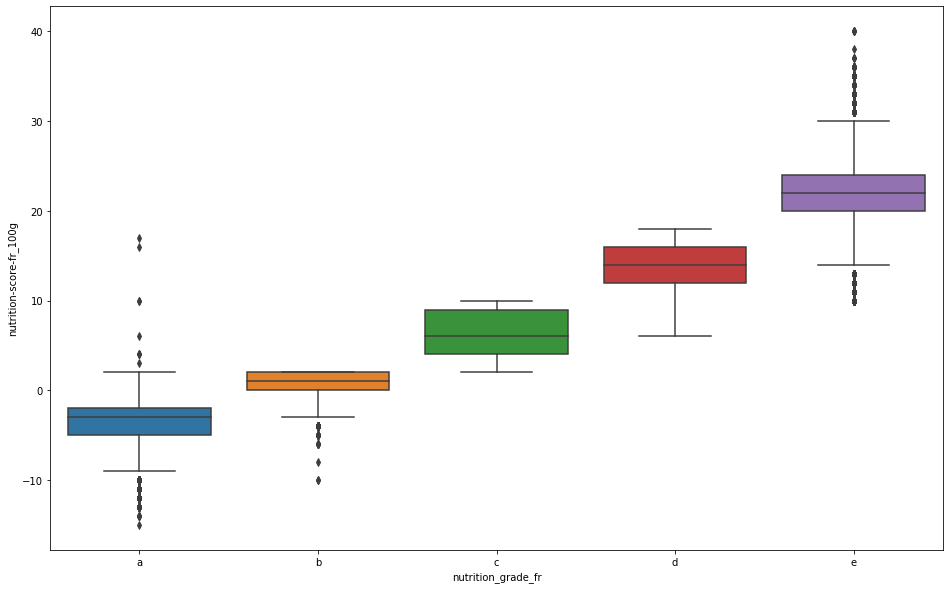

In [10]:
plt.figure(figsize=(16, 10))
sns.boxplot(x='nutrition_grade_fr', y='nutrition-score-fr_100g', data=df.sort_values('nutrition_grade_fr'))

In [11]:
df[(df['nutrition-score-fr_100g'] > -1) & 
    (df['nutrition-score-fr_100g'] == 'a')][['product_name', 'nutrition-score-fr_100g','nutrition_grade_fr']]

Empty DataFrame
Columns: [product_name, nutrition-score-fr_100g, nutrition_grade_fr]
Index: []

# Analyse plus détaillée des données et des colonnes manquantes

In [12]:
def analyse_donnees_manquantes(df, seuil = .8):
    nb_rows, nb_cols = df.shape

    nb_col_many_nulls = (((df.isnull().sum()) / nb_rows) > seuil)

    percentage_col_many_nulls = round(((nb_col_many_nulls.sum()) / nb_cols) * 100, 2)

    message = ( 
        f"{percentage_col_many_nulls} % des colonnes ont >= {seuil*100:0.0f}% de données manquantes \n"  
        f"Ces colonnes sont : \n"
        f"{nb_col_many_nulls[nb_col_many_nulls].to_string()}"
    )

    print(message)
    
analyse_donnees_manquantes(df)

66.67 % des colonnes ont >= 80% de données manquantes 
Ces colonnes sont : 
generic_name                                  True
origins                                       True
origins_tags                                  True
manufacturing_places                          True
manufacturing_places_tags                     True
labels                                        True
labels_tags                                   True
labels_fr                                     True
emb_codes                                     True
emb_codes_tags                                True
first_packaging_code_geo                      True
cities                                        True
cities_tags                                   True
purchase_places                               True
stores                                        True
allergens                                     True
allergens_fr                                  True
traces                                        True
traces

On voit que 66.67 % des colonnes ont >=80% de données manquantes

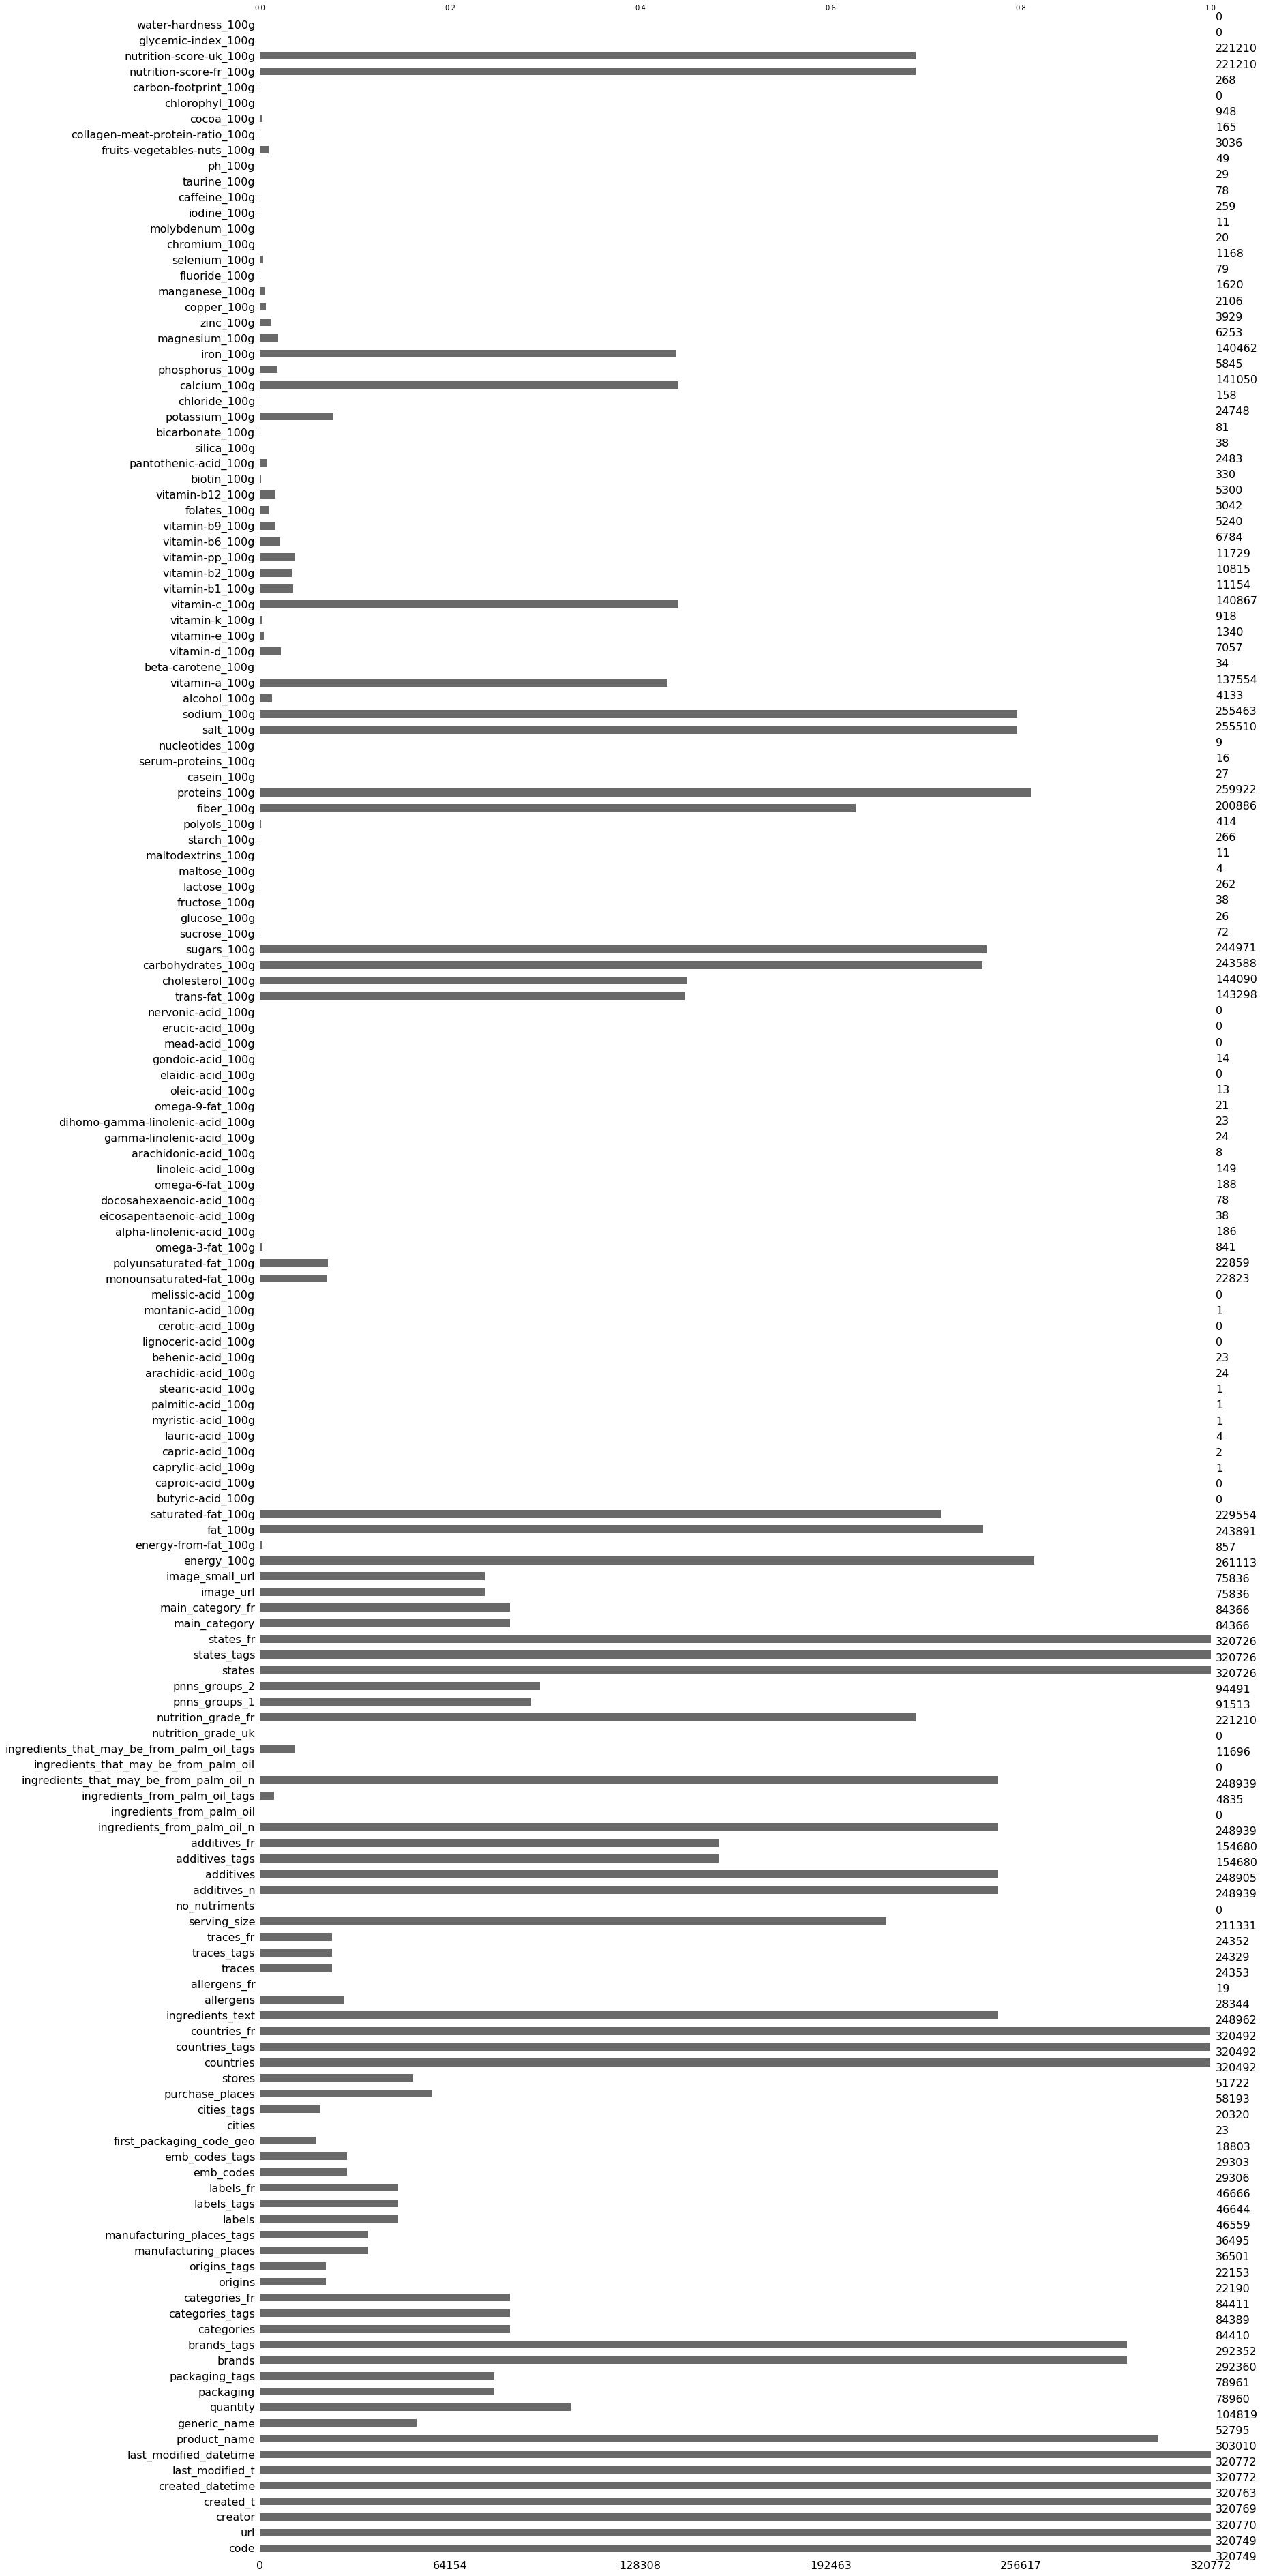

In [13]:
msno.bar(df)

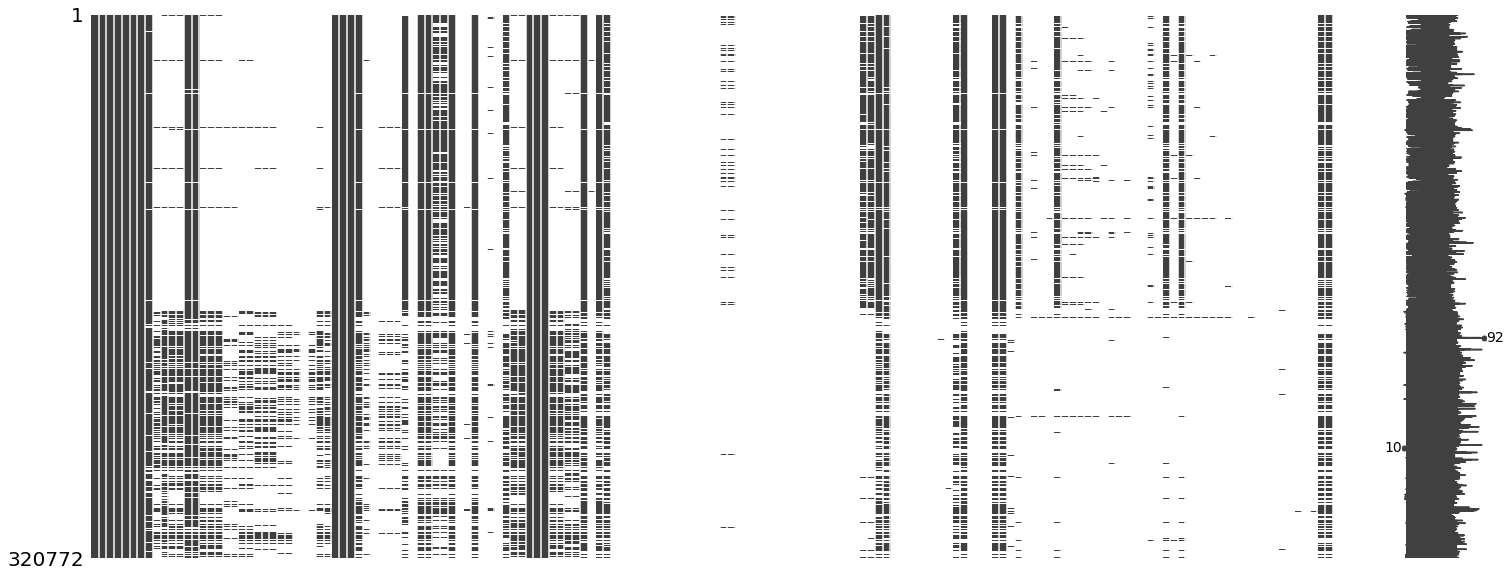

In [14]:
msno.matrix(df)

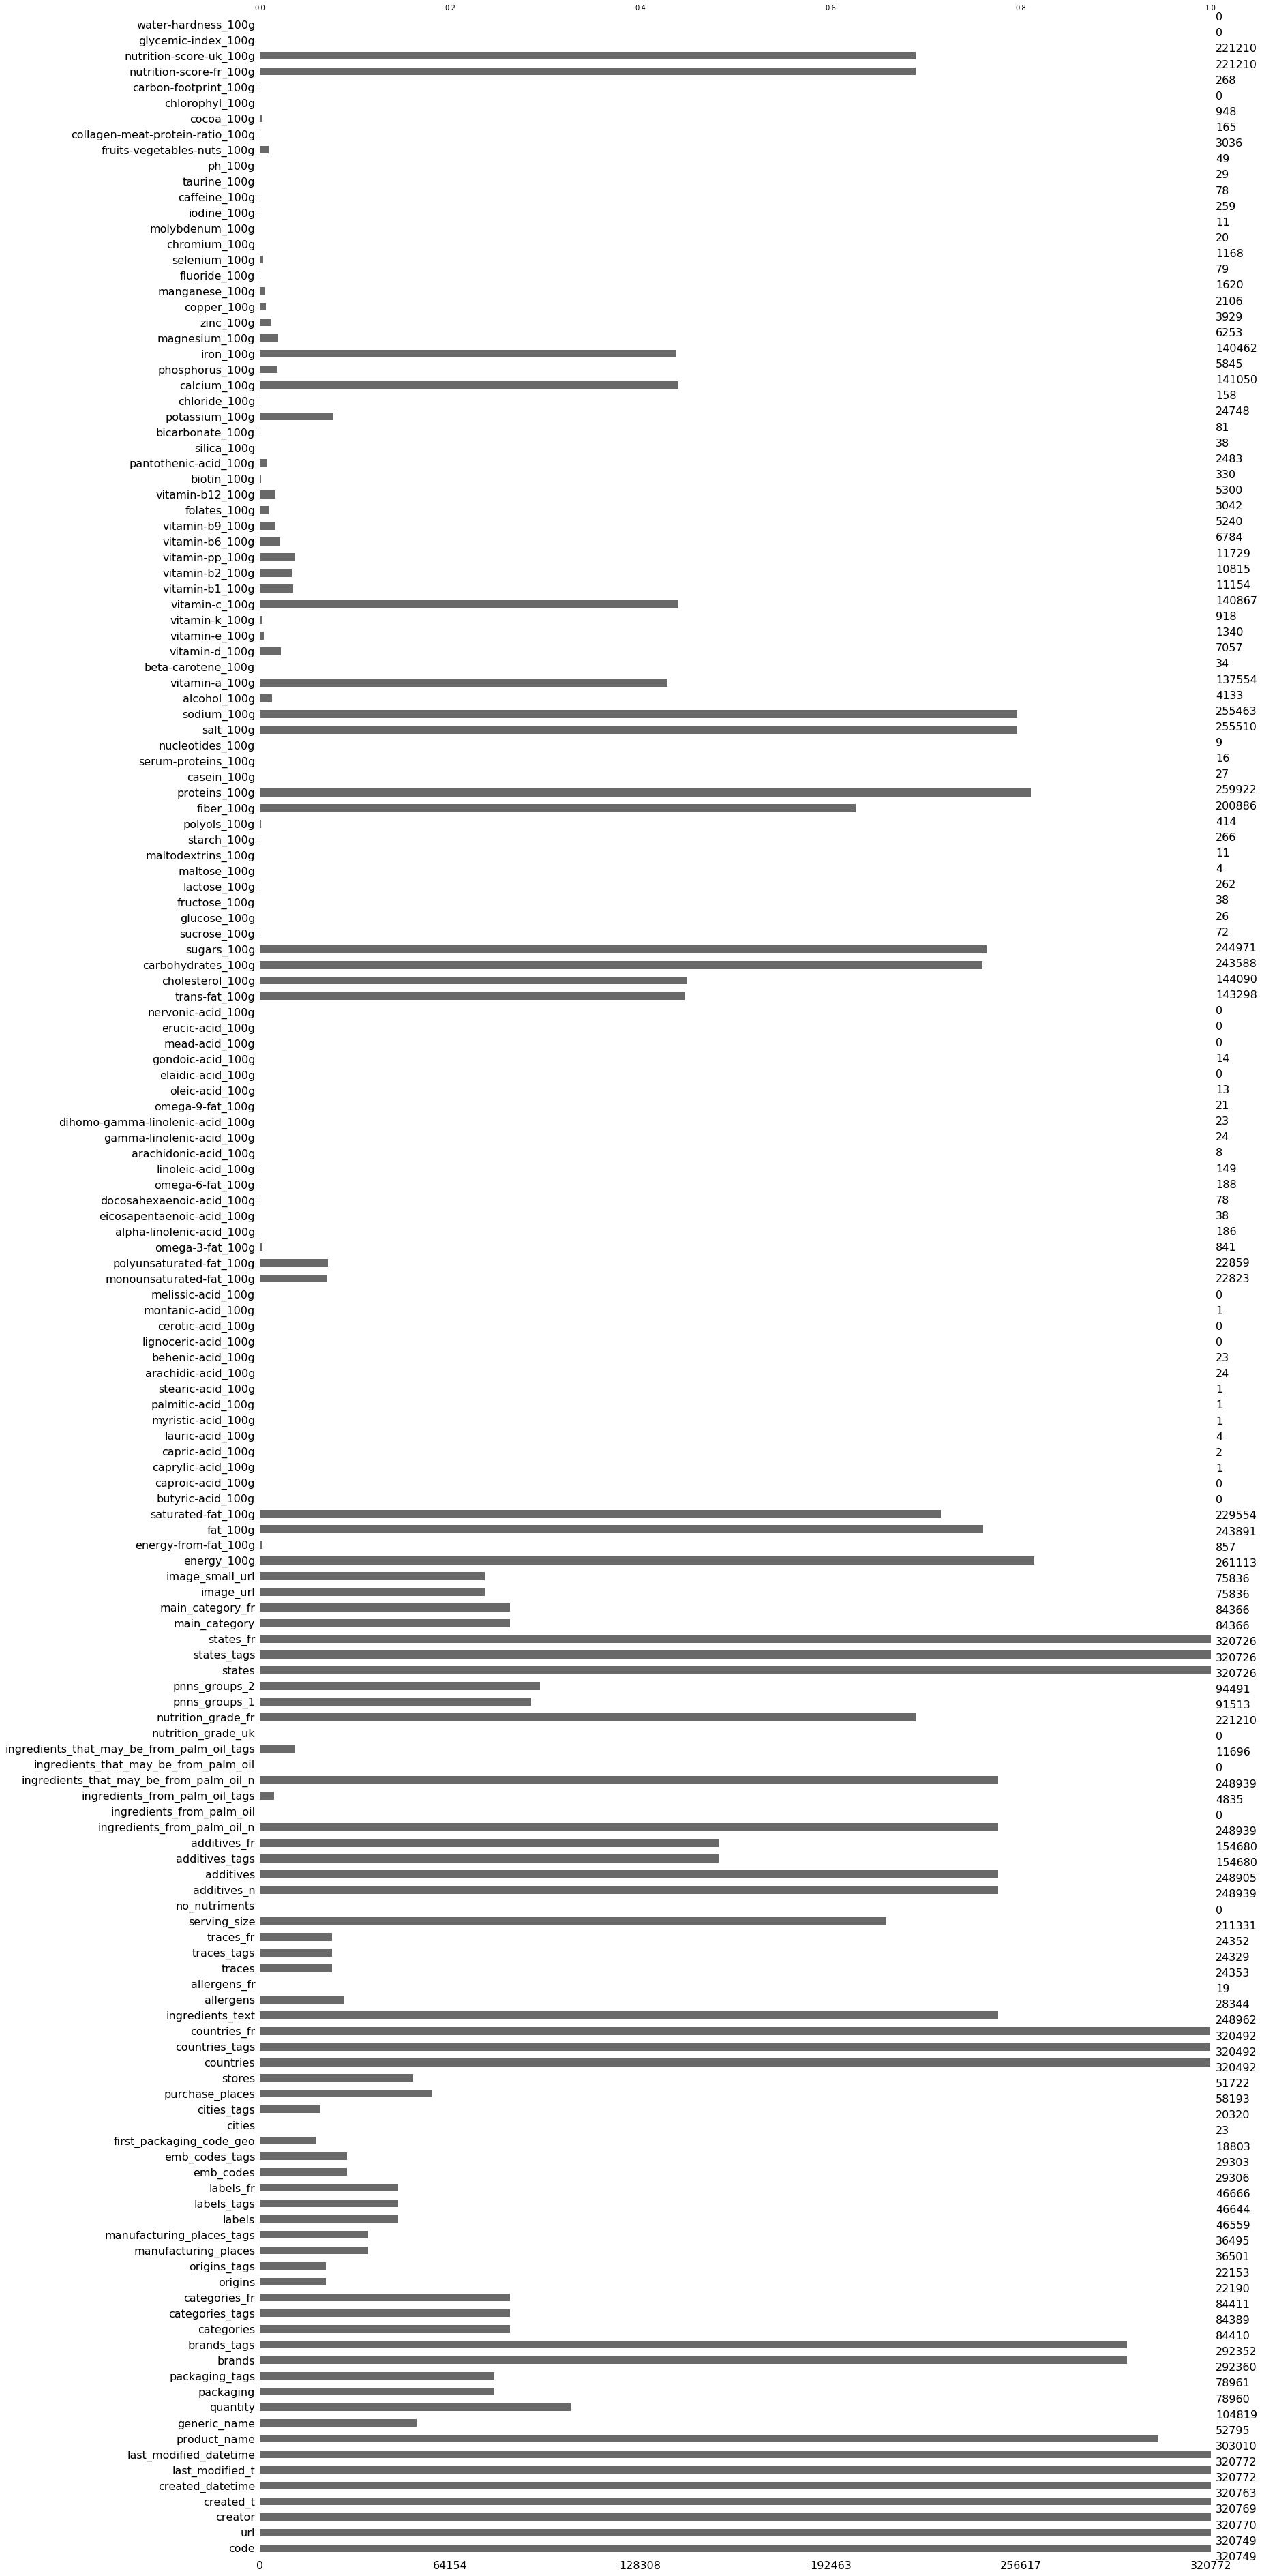

In [15]:
msno.bar(df)

# Drop Columns with 80% nan values FOOD


In [16]:
perc = 80.0
min_count = int(((100-perc)/100)*df.shape[0]+1)
food = df.dropna(axis=1, thresh = min_count) 

In [17]:
food.shape

(320772, 54)

In [18]:
for i in food:
    print(i)

code
url
creator
created_t
created_datetime
last_modified_t
last_modified_datetime
product_name
quantity
packaging
packaging_tags
brands
brands_tags
categories
categories_tags
categories_fr
countries
countries_tags
countries_fr
ingredients_text
serving_size
additives_n
additives
additives_tags
additives_fr
ingredients_from_palm_oil_n
ingredients_that_may_be_from_palm_oil_n
nutrition_grade_fr
pnns_groups_1
pnns_groups_2
states
states_tags
states_fr
main_category
main_category_fr
image_url
image_small_url
energy_100g
fat_100g
saturated-fat_100g
trans-fat_100g
cholesterol_100g
carbohydrates_100g
sugars_100g
fiber_100g
proteins_100g
salt_100g
sodium_100g
vitamin-a_100g
vitamin-c_100g
calcium_100g
iron_100g
nutrition-score-fr_100g
nutrition-score-uk_100g


# Filtre sur les produits vendus en France

L'objectif étant de préparer des données pour des recettes pour un site français, on va faire l'hypothèse que les produits de ces recettes sont vendus en France.


Décider de quel champ utiliser pour filtrer sur le pays

3 champs sont disponibles pour cela. Ils ont le même pourcentage de valeurs présentes :
countries 0.999127
countries_tags 0.999127
countries_fr 0.999127


In [19]:
food['countries_tags'].value_counts()

en:united-states                                                        172998
en:france                                                                94391
en:switzerland                                                           14953
en:germany                                                                7870
en:spain                                                                  5009
                                                                         ...  
en:armenia,en:france,en:germany,en:italy,en:romania,en:russia                1
en:denmark,en:france,en:germany,en:india                                     1
en:czech-republic,en:denmark,en:france,en:germany                            1
en:denmark,en:france,en:germany,en:russia,en:spain,en:united-kingdom         1
en:china,en:hong-kong                                                        1
Name: countries_tags, Length: 725, dtype: int64

In [20]:
food['countries'].value_counts()

US                                            169928
France                                         77292
en:FR                                          16979
Suisse                                         12314
Deutschland                                     6161
                                               ...  
Tschechien,Dänemark,Frankreich,Deutschland         1
Danemark,Allemagne,France                          1
Dänemark,Frankreich,Deutschland,Indien             1
Dänemark                                           1
Hong Kong,China                                    1
Name: countries, Length: 1434, dtype: int64

In [21]:
food['countries_fr'].value_counts()

États-Unis                                      172998
France                                           94392
Suisse                                           14953
Allemagne                                         7870
Espagne                                           5009
                                                 ...  
Danemark,Suisse,en:Deutschland,en:Frankreich         1
France,Luxembourg,Suisse                             1
Autriche,République tchèque,Allemagne                1
Allemagne,Hongrie                                    1
Chine,Hong Kong                                      1
Name: countries_fr, Length: 722, dtype: int64

Voici les filtres envisageables pour la France dans ces 3 colonnes :

In [22]:
len(food[food['countries_tags'].str.contains("france")==True])

98440

In [23]:
len(food[ ( food['countries'].str.contains("France", case=False)==True ) | ( food['countries'].str.contains("FR")==True )  ] )

98130

In [24]:
len(food[food['countries_fr'].str.contains("France")==True])

98440

On voit que les filtres countries_fr et countries_tags sont équivalents car ils renvoient le même nombre de lignes
En revanche le filtre sur countries ne permet pas de renvoyer autant de lignes que les autres.
Le tableau ci-dessous permet de lister toutes les valeurs qui détectent la France selon le filtre sur countries_fr, mais qui ne la détectent pas selon le filtre sur countries.
Il permet de voir pourquoi le filtre sur countries renvoie moins de lignes (c'est parce que dans le champ countries, le nom du pays est traduit dans différents langages), et il permet aussi de confirmer par une inspection visuelle que les filtres sur countries_tags et countries_fr sont équivalents

In [25]:
food[( food['countries_fr'].str.contains("France", na=False) == True ) &  
     ( 
         ( food['countries'].str.contains("France", case=False, na=False)==True ) | 
         ( food['countries'].str.contains("FR", na=False)==True ) == False 
     )][['countries', 'countries_fr', 'countries_tags']]

countries                                       countries_fr                                     countries_tags
20795                              Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
69085               Франция,Россия,Испания,Великобритания                  France,Russie,Espagne,Royaume-Uni     en:france,en:russia,en:spain,en:united-kingdom
143199                        França,Portugal,Reino Unido                        France,Portugal,Royaume-Uni            en:france,en:portugal,en:united-kingdom
176587  Dinamarca,França,Itália,Países Baixos,Polónia,...  Danemark,France,Italie,Pays-Bas,Pologne,Portug...  en:denmark,en:france,en:italy,en:netherlands,e...
176861                                     Francia,España                                     France,Espagne                                 en:france,en:spain
176862                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
176925                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177007                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177026                                     Francia,España                                     France,Espagne                                 en:france,en:spain
177109                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177189                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177254                                     Francia,España                                     France,Espagne                                 en:france,en:spain
177307                                     Francia,España                                     France,Espagne                                 en:france,en:spain
177317                                    França,Portugal                                    France,Portugal                              en:france,en:portugal
177396                     Frankreich,Deutschland,Italien                            France,Allemagne,Italie                      en:france,en:germany,en:italy
177419                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177569                     Frankreich,Deutschland,Schweiz                            France,Allemagne,Suisse                en:france,en:germany,en:switzerland
177699                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177726                     Belgien,Frankreich,Deutschland                          Belgique,France,Allemagne                    en:belgium,en:france,en:germany
177839                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177841                     Frankreich,Deutschland,Spanien                           France,Allemagne,Espagne                      en:france,en:germany,en:spain
177900                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
177950                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
178005                             Frankreich,Deutschland                                   France,Allemagne                               en:france,en:germany
178126                             Frankreich,De

In [26]:
food_fr = food[food['countries_fr'].str.contains("France")==True].copy()

In [27]:
food_fr.shape

(98440, 54)

In [28]:
analyse_donnees_manquantes(food_fr)

11.11 % des colonnes ont >= 80% de données manquantes 
Ces colonnes sont : 
trans-fat_100g      True
cholesterol_100g    True
vitamin-a_100g      True
vitamin-c_100g      True
calcium_100g        True
iron_100g           True


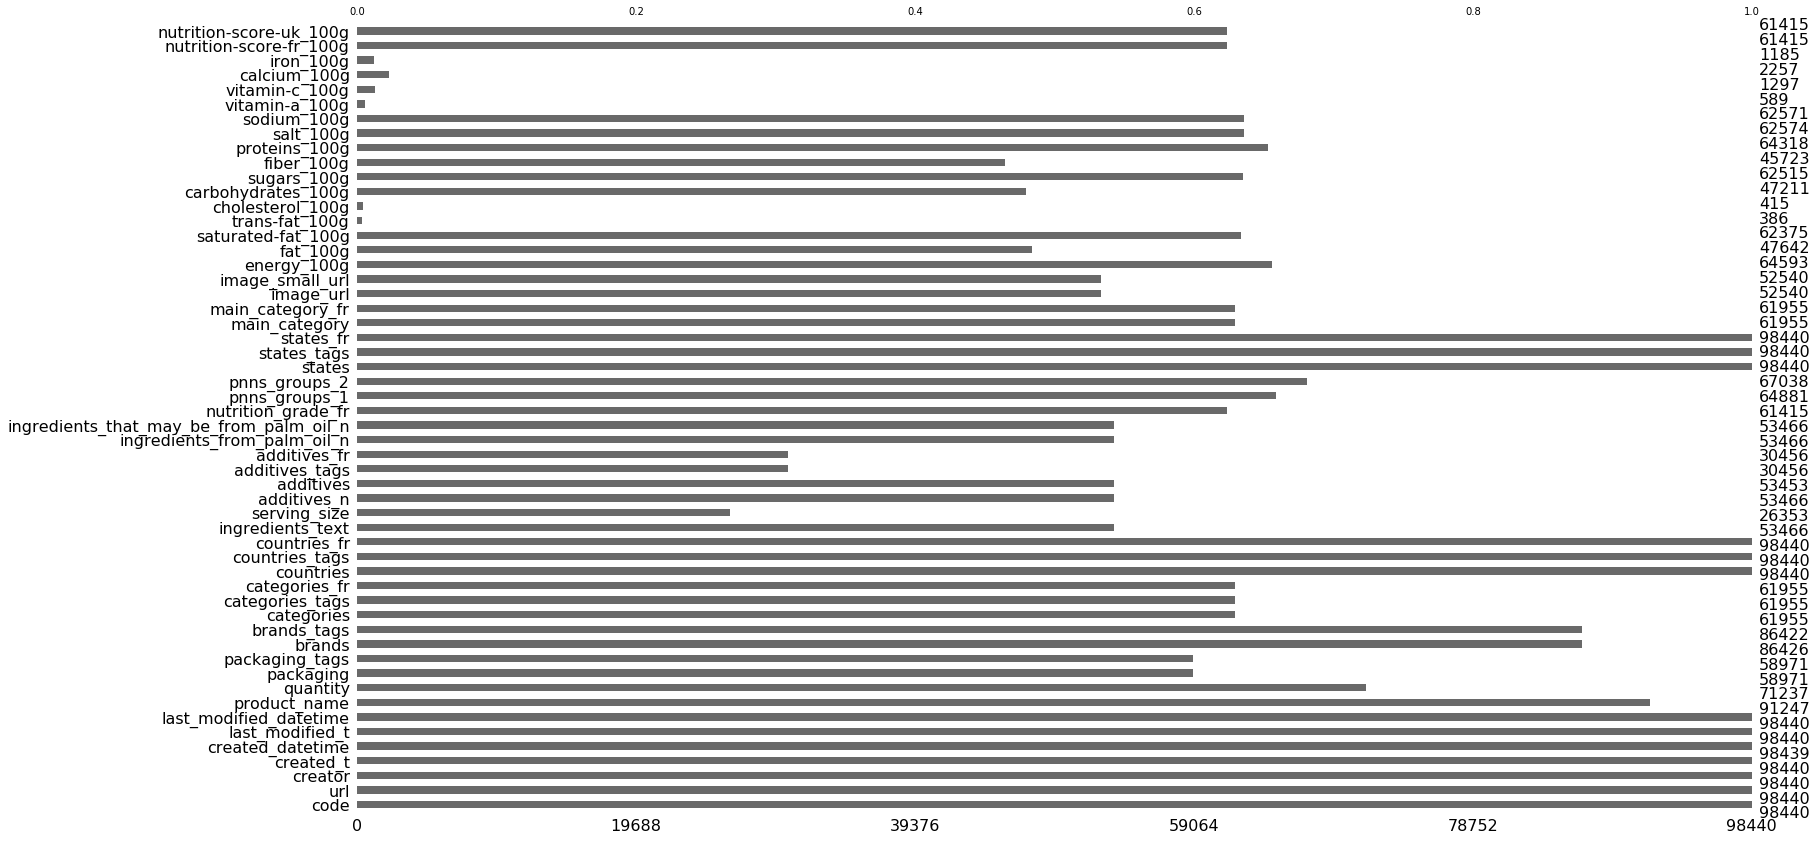

In [29]:
msno.bar(food_fr)

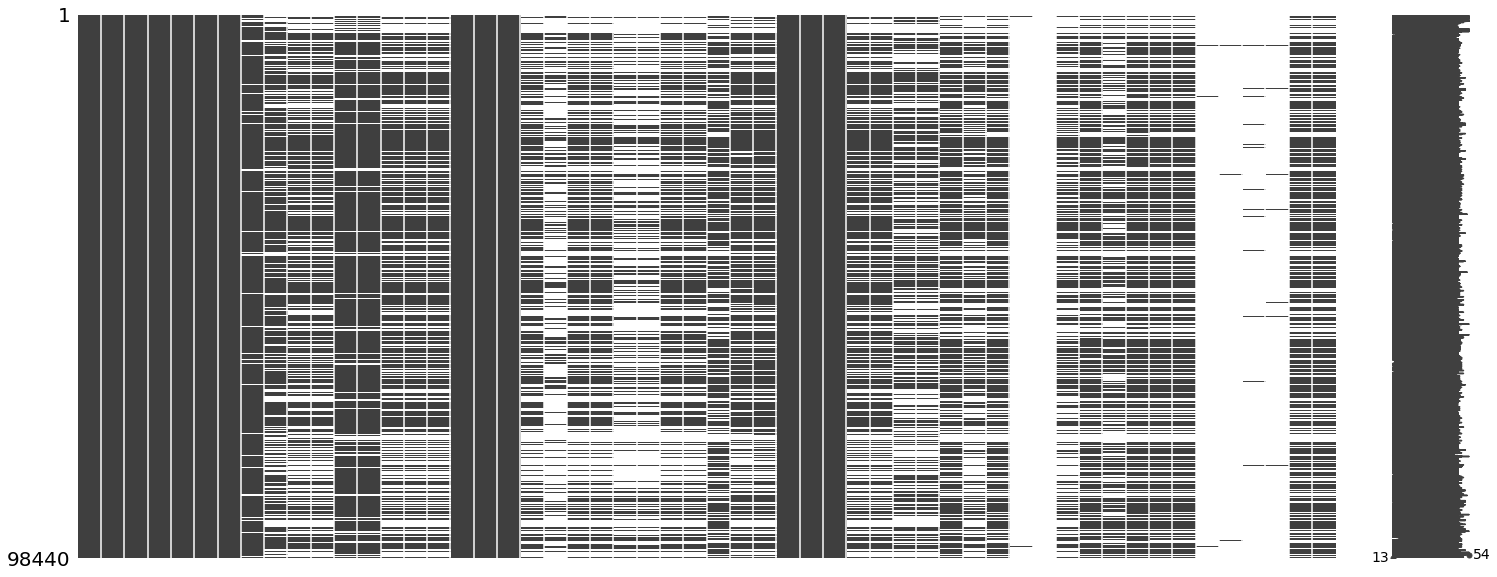

In [30]:
msno.matrix(food_fr)

In [31]:
def null_factor(df, tx_threshold=50):
  null_rate = ((food_fr.isnull().sum() / food_fr.shape[0])*100).sort_values(ascending=False).reset_index()
  null_rate.columns = ['Variable','Taux_de_Null']
  high_null_rate = null_rate[null_rate.Taux_de_Null >= tx_threshold]
  return high_null_rate

In [32]:
full_null_rate = null_factor(food_fr, 100)
full_null_rate

Empty DataFrame
Columns: [Variable, Taux_de_Null]
Index: []



Nous allons regarder le taux de remplissage des variables graphiquement et fixer un seuil de suppression à 25% de taux de remplissage :


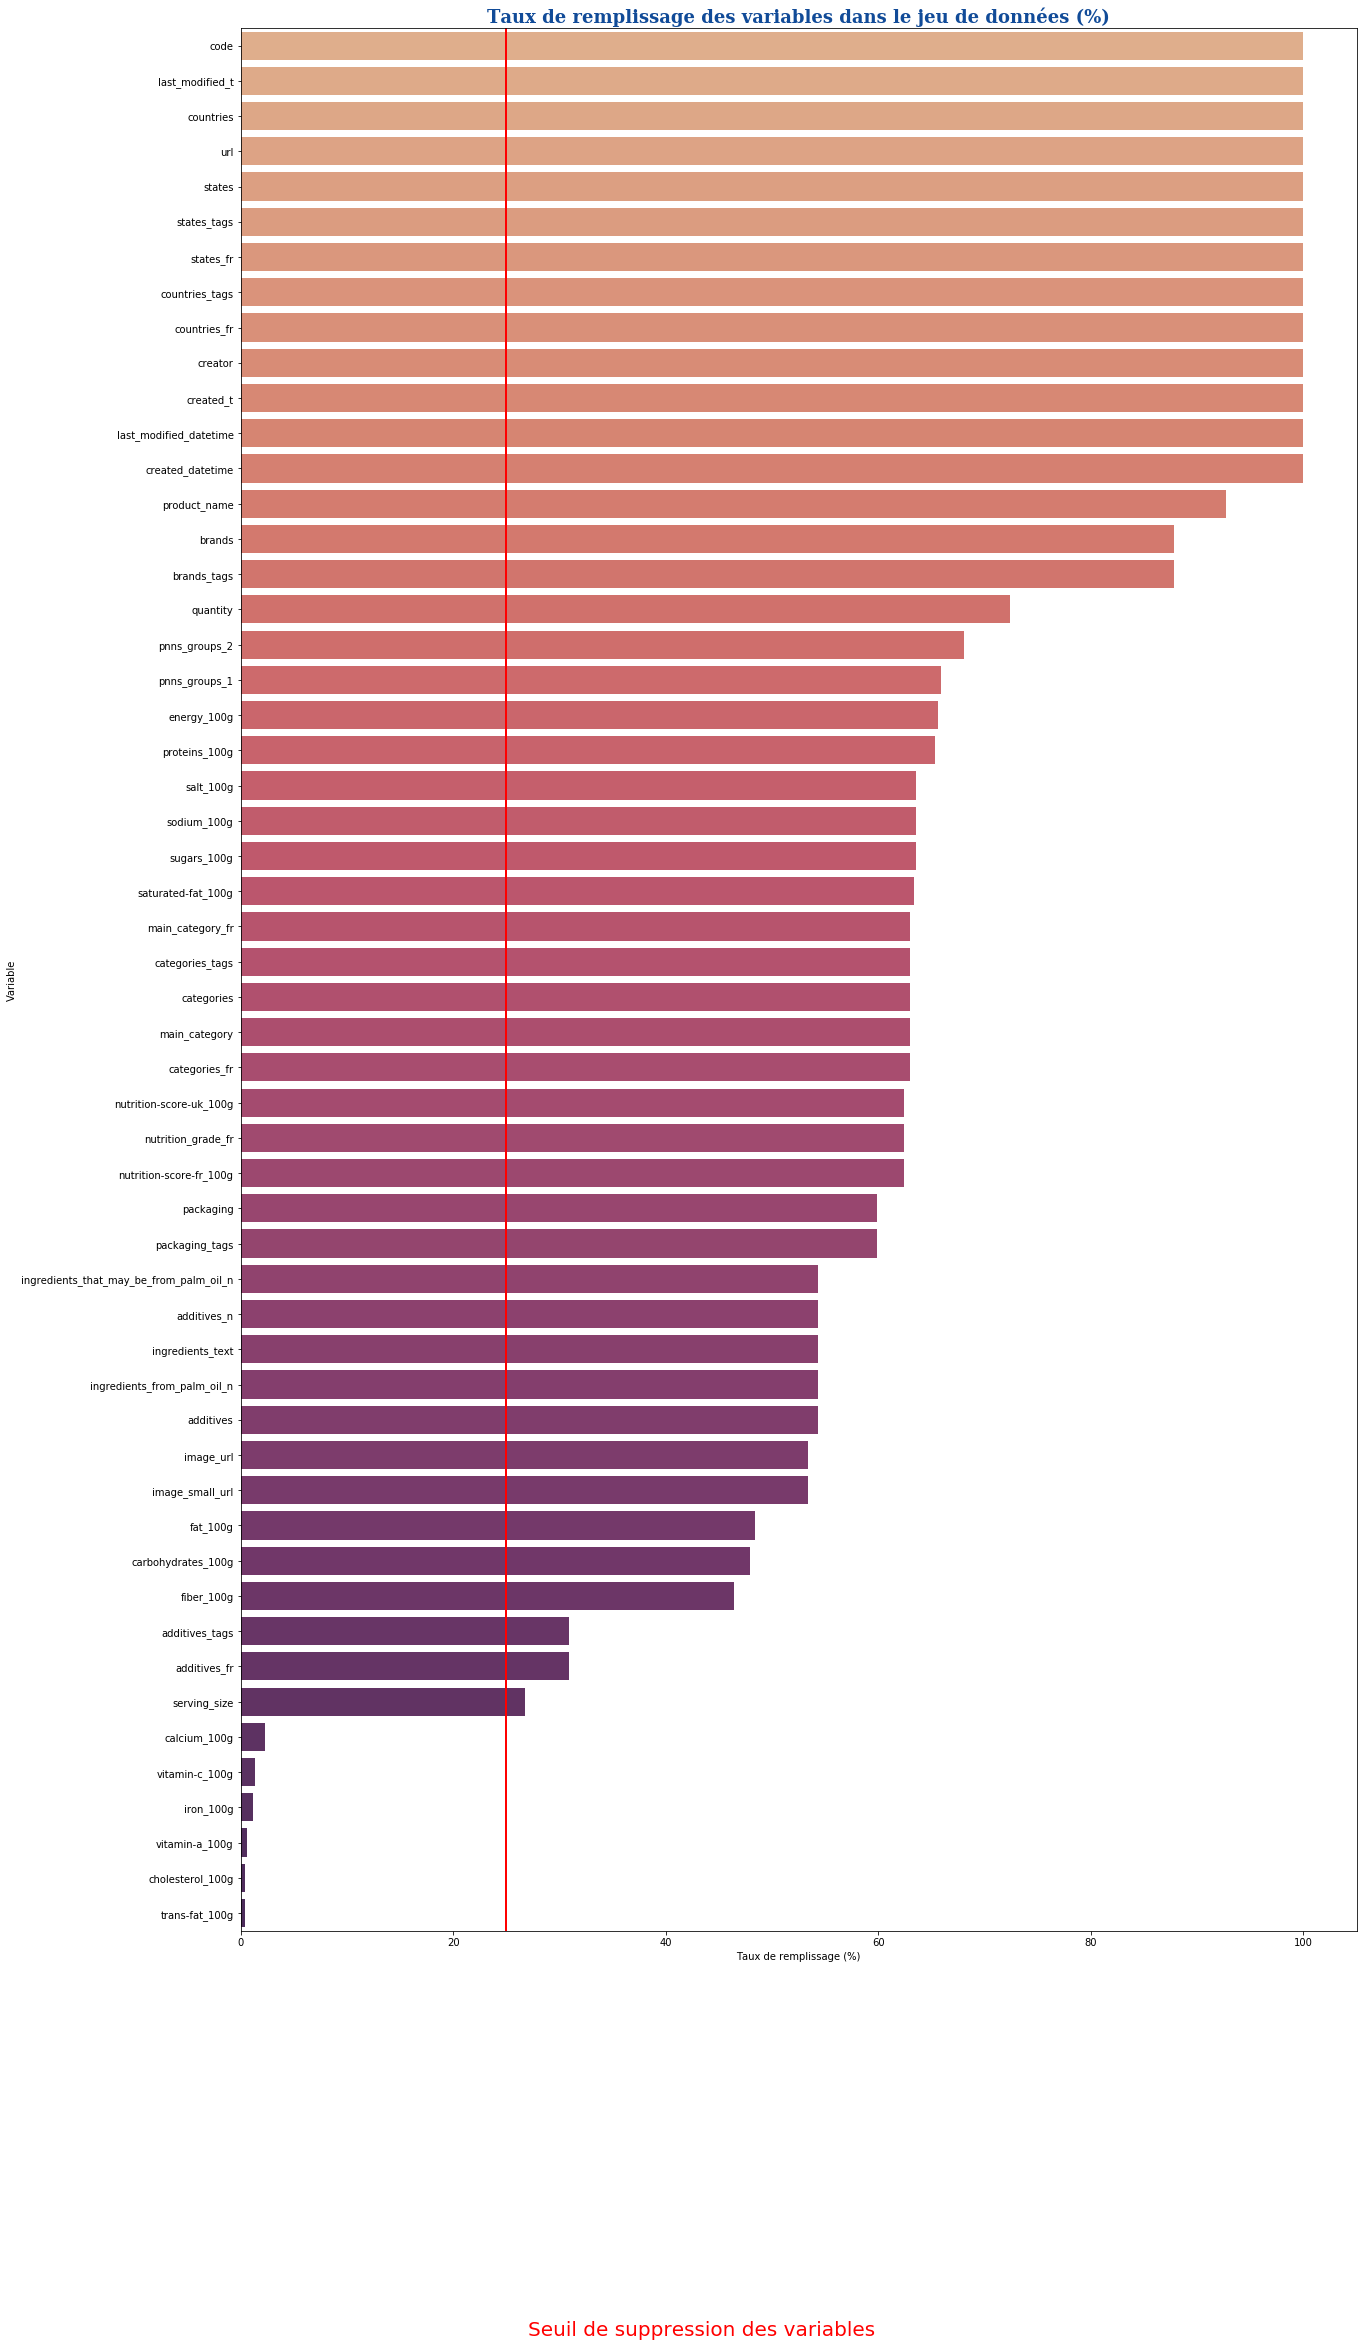

In [33]:
filling_features = null_factor(food_fr, 0)
filling_features["Taux_de_Null"] = 100-filling_features["Taux_de_Null"]
filling_features = filling_features.sort_values("Taux_de_Null", ascending=False) 

#Seuil de suppression
sup_threshold = 25

fig = plt.figure(figsize=(20, 35))

font_title = {'family': 'serif',
              'color':  '#114b98',
              'weight': 'bold',
              'size': 18,
             }

sns.barplot(x="Taux_de_Null", y="Variable", data=filling_features, palette="flare")
#Seuil pour suppression des varaibles
plt.axvline(x=sup_threshold, linewidth=2, color = 'r')
plt.text(sup_threshold+2, 65, 'Seuil de suppression des variables', fontsize = 20, color = 'r')

plt.title("Taux de remplissage des variables dans le jeu de données (%)", fontdict=font_title)
plt.xlabel("Taux de remplissage (%)")
plt.show()

7 features sur 54 ont un taux de valeurs nulles supérieurs à 50%, ce qui représente une très grosse part de données manquantes. La majeur partie de ces variables ne peuvent pas être recalculées puisqu'il s'agot de mesures physico-chimiques directes sur les produits. Nous allons donc les supprimer.

In [34]:
food_fr = food_fr.drop(['calcium_100g', 'iron_100g','vitamin-a_100g','vitamin-c_100g','cholesterol_100g','trans-fat_100g'], axis=1)

In [35]:
food_fr.shape

(98440, 48)

In [36]:
def search_componant(df, suffix='_100g'):
  componant = []
  for col in df.columns:
      if '_100g' in col: componant.append(col)
  df_subset_columns = df[componant]
  return df_subset_columns



In [37]:
search_componant(food_fr,'_100g')

energy_100g  fat_100g  saturated-fat_100g  carbohydrates_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g  sodium_100g  nutrition-score-fr_100g  nutrition-score-uk_100g
0               NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
46              NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
48              NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
106          1883.0      20.0                12.5                70.0         57.5         2.5            2.5    0.09652        0.038                     22.0                     22.0
136             NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
...             ...       ...                 ...                 ...          ...         ...            ...        ...          ...                      ...                      ...
320761          NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
320763         21.0       0.2                 0.2                 0.5          0.5         0.2            0.5    0.02540        0.010                      2.0                      0.0
320764          NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
320765          NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN
320770          NaN       NaN                 NaN                 NaN          NaN         NaN            NaN        NaN          NaN                      NaN                      NaN

[98440 rows x 11 columns]

In [38]:
missing(food_fr)

serving_size                               73.23
additives_tags                             69.06
additives_fr                               69.06
fiber_100g                                 53.55
carbohydrates_100g                         52.04
fat_100g                                   51.60
image_small_url                            46.63
image_url                                  46.63
additives                                  45.70
ingredients_text                           45.69
ingredients_that_may_be_from_palm_oil_n    45.69
ingredients_from_palm_oil_n                45.69
additives_n                                45.69
packaging                                  40.09
packaging_tags                             40.09
nutrition-score-fr_100g                    37.61
nutrition_grade_fr                         37.61
nutrition-score-uk_100g                    37.61
main_category                              37.06
main_category_fr                           37.06
categories_fr       

# Variables redondantes

’

Nutriscore: Decider quelle feature conserver 

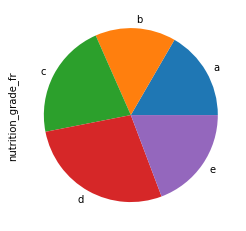

In [39]:
food_fr.groupby(['nutrition_grade_fr'])['nutrition_grade_fr'].count().plot(kind='pie')

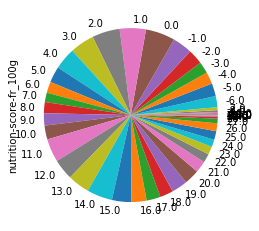

In [40]:


food_fr.groupby(['nutrition-score-fr_100g'])['nutrition-score-fr_100g'].count().plot(kind='pie')



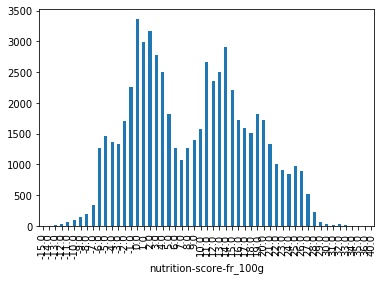

In [41]:
food_fr.groupby(['nutrition-score-fr_100g'])['nutrition-score-fr_100g'].count().plot(kind='bar')

In [42]:
# à decider plus tard

In [43]:
category_columns = ['categories','categories_tags','categories_fr']
food_fr[food_fr[category_columns].notnull().any(axis=1)][['product_name'] + category_columns].sample(5)

product_name                                         categories                                    categories_tags                                      categories_fr
230864  Chocolat Noir Amandes Entières Caramélisées  Snacks sucrés,Chocolats,Chocolats avec amandes...  en:sugary-snacks,en:chocolates,en:chocolates-w...  Snacks sucrés,Chocolats,Chocolats avec amandes...
253543                   Galettes riz chocolat lait                Galettes de riz au chocolat au lait  en:plant-based-foods-and-beverages,en:plant-ba...  Aliments et boissons à base de végétaux,Alimen...
198094                        Vanille arôme naturel                       Additifs alimentaires,Arômes                       en:food-additives,en:flavors                       Additifs alimentaires,Arômes
226200   25CL Vinaigre Balsamique Modene Bio Cauvin                    Vinaigres balsamiques de Modène  en:vinegars,en:balsamic-vinegars,it:aceto-bals...  Vinaigres,Vinaigres balsamiques,Vinaigres bals...
212512           2 steaks hachés pur bœuf (15 % MG)  Frais,Viandes,Boeuf,Viandes fraîches,Steaks,St...  en:fresh-foods,en:meats,en:beef,en:fresh-meats...  Frais,Viandes,Boeuf,Viandes fraîches,Steaks,St...

In [45]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_fr" in col:
      en = col.replace('_fr','')
      tags = col.replace('_fr','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,en in df.columns, tags in df.columns))
      if en in df.columns : 
        redundant_columns.append(en)
      if tags in df.columns : 
        redundant_columns.append(tags)
  
    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns



# Sodium ou Salt ?

In [46]:
compare_na(food, 'sodium_100g', 'salt_100g')

Cas où sodium_100g est renseigné mais pas salt_100g : 0.0%
Cas où salt_100g est renseigné mais pas sodium_100g : 0.01465%
Cas où sodium_100g et salt_100g sont renseignés tous les deux : 79.64006%


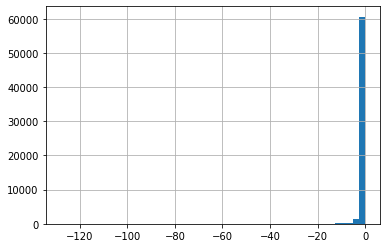

In [47]:
(food_fr['sodium_100g'] - food_fr['salt_100g']).hist(bins=50)

In [48]:
len(food_fr['sodium_100g'])

98440

In [49]:
len(food_fr['salt_100g'])

98440

In [50]:
food_fr['sodium_100g'].sum()

28590.17221470402

In [51]:
food_fr['salt_100g'].sum()

72619.30886916822

In [52]:
food_fr['salt_100g'].isin(food_fr['sodium_100g']).value_counts()

True     85704
False    12736
Name: salt_100g, dtype: int64

# Date

Les dates également comportent une certaine redondance. Entre les timestamp et les dates au format "yyyy-mm-dd", il est nécessaire d'en éliminer :

In [70]:
food_fr['created_datetime'] = pd.to_datetime(food_fr['created_t'], unit='s')
food_fr['last_modified_datetime'] = pd.to_datetime(food_fr['last_modified_t'], unit='s')
food_fr = food_fr.drop(['created_t','last_modified_t'], axis=1)
food_fr.head()

KeyError: 'created_t'

In [71]:
food_fr[['created_datetime','code']].groupby(by=food_fr['created_datetime'].dt.year).nunique()

created_datetime   code
created_datetime                         
1970                             1      1
2012                          3256   3257
2013                          8322   8399
2014                          9205   9242
2015                         22973  23015
2016                         30758  30975
2017                         23491  23550

In [72]:
food_fr['addperyear']=food_fr[['created_datetime','code']].groupby(by=food_fr['created_datetime'].dt.year).nunique()


ValueError: Wrong number of items passed 2, placement implies 1

In [64]:
fig=plt.figure(figsize=(12,8))

sns.set_style("whitegrid")
sns.barplot(data=add_per_year, x=add_per_year.index, y='code', color='#00afe6')

plt.title("Evolution des créations de produits dans la base par année", fontdict=font_title)
plt.xlabel("Année de création")
plt.ylabel("Nombre de créations")
plt.show()



NameError: name 'add_per_year' is not defined

<Figure size 864x576 with 0 Axes>

In [65]:
#Sous représentation de l'année 1970, nous pouvons la supprimer

In [66]:
food_fr['add_per_year'] = food_fr['created_datetime'].dt.year.nunique()


In [67]:
food_fr[food_fr['add_per_year']==1970]

Empty DataFrame
Columns: [code, url, creator, created_datetime, last_modified_datetime, product_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_fr, countries, countries_tags, countries_fr, ingredients_text, serving_size, additives_n, additives, additives_tags, additives_fr, ingredients_from_palm_oil_n, ingredients_that_may_be_from_palm_oil_n, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_fr, main_category, main_category_fr, image_url, image_small_url, energy_100g, fat_100g, saturated-fat_100g, carbohydrates_100g, sugars_100g, fiber_100g, proteins_100g, salt_100g, sodium_100g, nutrition-score-fr_100g, nutrition-score-uk_100g, add_per_year]
Index: []

In [68]:
food_fr = food_fr.drop(['add_per_year'], axis=1)

In [69]:
food_fr['add_per_year'].drop(inplace=False)

KeyError: 'add_per_year'

# Packaging

In [73]:
food_fr[['packaging','packaging_tags']].head(46)

packaging                 packaging_tags
0                              NaN                            NaN
46                       plastique                      plastique
48                             NaN                            NaN
106                            NaN                            NaN
136                            NaN                            NaN
138                            NaN                            NaN
182               Sachet plastique               sachet-plastique
183                            NaN                            NaN
184                   Carton,boîte                   carton,boite
187                         Carton                         carton
188                      aluminium                      aluminium
189         Carton,Bouteille,Verre         carton,bouteille,verre
190                            NaN                            NaN
191                            NaN                            NaN
194                            NaN                            NaN
224                      emballage                      emballage
225                            NaN                            NaN
226              Canette aluminium              canette-aluminium
227                            NaN                            NaN
232                         Beutel                         beutel
234                            NaN                            NaN
240                        Canette                        canette
242               Carton,Plastique               carton,plastique
271                            NaN                            NaN
279  boîte,carton,plastique,sachet  boite,carton,plastique,sachet
280                            NaN                            NaN
283  Boîte,Carton,Sachet,Plastique  boite,carton,sachet,plastique
284            Barquette,Plastique            barquette,plastique
299  Boîte carton,Sachet plastique  boite-carton,sachet-plastique
301  Boîte carton,Sachet Plastique  boite-carton,sachet-plastique
304                           item                           item
307                            NaN                            NaN
339                            NaN                            NaN
415                        Canette                        canette
425                            NaN                            NaN
426                            NaN                            NaN
427                            NaN                            NaN
428         Boîte,Carton,Plastique         boite,carton,plastique
431                       Conserve                       conserve
432                            NaN                            NaN
433                            NaN                            NaN
434                            NaN                            NaN
435                            NaN                            NaN
436                            NaN                            NaN
437                      barquette                      barquette
443                       Conserve                       conserve

In [74]:
food_fr['packaging'].count()

58971

In [75]:
food_fr['packaging'].count()

58971

In [76]:
food_fr['packaging'] == food_fr['packaging_tags']

0         False
46         True
48        False
106       False
136       False
          ...  
320761    False
320763    False
320764    False
320765    False
320770    False
Length: 98440, dtype: bool

# Brands

In [77]:
def getDuplicateColumns(df):
    '''
    Get a list of duplicate columns.
    It will iterate over all the columns in dataframe and find the columns whose contents are duplicate.
    :param df: Dataframe object
    :return: List of columns whose contents are duplicates.
    '''
    duplicateColumnNames = set()
    # Iterate over all the columns in dataframe
    for x in range(df.shape[1]):
        # Select column at xth index.
        col = df.iloc[:, x]
        # Iterate over all the columns in DataFrame from (x+1)th index till end
        for y in range(x + 1, df.shape[1]):
            # Select column at yth index.
            otherCol = df.iloc[:, y]
            # Check if two columns at x 7 y index are equal
            if col.equals(otherCol):
                duplicateColumnNames.add(df.columns.values[y])
    return list(duplicateColumnNames)

In [78]:
# Get list of duplicate columns
duplicateColumnNames = getDuplicateColumns(df)
print('Duplicate Columns are as follows')
for col in duplicateColumnNames:
    print('Column name : ', col)

Duplicate Columns are as follows
Column name :  nutrition_grade_uk
Column name :  erucic-acid_100g
Column name :  caproic-acid_100g
Column name :  glycemic-index_100g
Column name :  nervonic-acid_100g
Column name :  butyric-acid_100g
Column name :  elaidic-acid_100g
Column name :  ingredients_from_palm_oil
Column name :  cerotic-acid_100g
Column name :  ingredients_that_may_be_from_palm_oil
Column name :  mead-acid_100g
Column name :  chlorophyl_100g
Column name :  water-hardness_100g
Column name :  lignoceric-acid_100g
Column name :  melissic-acid_100g


In [79]:
def duplicate_columns(frame):
    
    groups = frame.columns.to_series().groupby(frame.dtypes).groups
    dups = []
    for t, v in groups.items():
        dcols = frame[v].to_dict(orient="list")

        vs = dcols.values()
        ks = dcols.keys()
        lvs = len(vs)

        for i in range(lvs):
            for j in range(i+1,lvs):
                if vs[i] == vs[j]: 
                    dups.append(ks[i])
                    break

    return dups   

In [80]:
fff=  food_fr

In [81]:
def search_redundant_col(df):
  redundant_columns = []
  for col in df.columns:
    if "_fr" in col:
      en = col.replace('_fr','')
      tags = col.replace('_fr','_tags')
      print("{:<20} 'Sans suffixe' -> {} ; 'Suffixe _tags' -> {}".format(col,
                                                                        en in df.columns, tags in df.columns))
      if en in df.columns : 
        redundant_columns.append(en)
      if tags in df.columns : 
        redundant_columns.append(tags)
  
    if '_tags' in col:
      tags_2 = col.replace('_tags','')
      print("{:<20} 'Suffixe _tags' -> {} ;".format(tags_2, tags_2 in df.columns))
      if tags_2 in df.columns :
        redundant_columns.append(col)

  return redundant_columns

In [82]:
search_redundant_col(df)

packaging            'Suffixe _tags' -> True ;
brands               'Suffixe _tags' -> True ;
categories           'Suffixe _tags' -> True ;
categories_fr        'Sans suffixe' -> True ; 'Suffixe _tags' -> True
origins              'Suffixe _tags' -> True ;
manufacturing_places 'Suffixe _tags' -> True ;
labels               'Suffixe _tags' -> True ;
labels_fr            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
emb_codes            'Suffixe _tags' -> True ;
cities               'Suffixe _tags' -> True ;
countries            'Suffixe _tags' -> True ;
countries_fr         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
allergens_fr         'Sans suffixe' -> True ; 'Suffixe _tags' -> False
traces               'Suffixe _tags' -> True ;
traces_fr            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
additives            'Suffixe _tags' -> True ;
additives_fr         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
ingredients_from_palm_oil_n 'Sans suffixe' -> False ; 'Suffixe

['packaging_tags',
 'brands_tags',
 'categories_tags',
 'categories',
 'categories_tags',
 'origins_tags',
 'manufacturing_places_tags',
 'labels_tags',
 'labels',
 'labels_tags',
 'emb_codes_tags',
 'cities_tags',
 'countries_tags',
 'countries',
 'countries_tags',
 'allergens',
 'traces_tags',
 'traces',
 'traces_tags',
 'additives_tags',
 'additives',
 'additives_tags',
 'ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
 'states_tags',
 'states',
 'states_tags',
 'main_category']

In [83]:
fff.drop(search_redundant_col(fff), axis=1, inplace=True)

packaging            'Suffixe _tags' -> True ;
brands               'Suffixe _tags' -> True ;
categories           'Suffixe _tags' -> True ;
categories_fr        'Sans suffixe' -> True ; 'Suffixe _tags' -> True
countries            'Suffixe _tags' -> True ;
countries_fr         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
additives            'Suffixe _tags' -> True ;
additives_fr         'Sans suffixe' -> True ; 'Suffixe _tags' -> True
ingredients_from_palm_oil_n 'Sans suffixe' -> False ; 'Suffixe _tags' -> False
ingredients_that_may_be_from_palm_oil_n 'Sans suffixe' -> False ; 'Suffixe _tags' -> False
nutrition_grade_fr   'Sans suffixe' -> False ; 'Suffixe _tags' -> False
states               'Suffixe _tags' -> True ;
states_fr            'Sans suffixe' -> True ; 'Suffixe _tags' -> True
main_category_fr     'Sans suffixe' -> True ; 'Suffixe _tags' -> False


In [84]:
fff.shape

(98440, 35)

In [85]:
food_fr.shape

(98440, 35)

In [86]:
food_fr.drop(columns=['nutrition-score-uk_100g', 'sodium_100g','ingredients_from_palm_oil_n'], inplace=True)

# Les catégories de produits

In [87]:
food_fr[['categories_fr','pnns_groups_1','pnns_groups_2','main_category_fr',]].sample(10)

categories_fr         pnns_groups_1       pnns_groups_2    main_category_fr
252303                                                NaN                   NaN                 NaN                 NaN
212293  Snacks sucrés,Biscuits et gâteaux,Biscuits,Bis...         Sugary snacks  Biscuits and cakes            Biscuits
244807                                     Produits panés               unknown             unknown      Produits panés
270995  Aliments et boissons à base de végétaux,Alimen...  Cereals and potatoes   Breakfast cereals     Petit-déjeuners
230693  Aliments et boissons à base de végétaux,Alimen...  Cereals and potatoes             Cereals  Pâtes alimentaires
229372                Conserves,Plats préparés,Cassoulets       Composite foods      One-dish meals           Conserves
318071  Aliments et boissons à base de végétaux,Alimen...          Salty snacks                Nuts     Fruits à coques
209985                                                NaN                   NaN                 NaN                 NaN
229888                                                NaN                   NaN                 NaN                 NaN
232660                                                NaN               unknown             unknown                 NaN

le nombre total de catégories représentées

In [88]:
def split_words(df, column = 'countries_en'):
  list_words = set()
  for word in df[column].str.split(','):
    if isinstance(word, float):
      continue
    list_words = set().union(word, list_words)
  return list(list_words)

In [89]:
categories = split_words(df = food_fr, column = 'categories_fr')
print("{} catégories sont représentées dans le jeu de données.".format(len(categories)))


9460 catégories sont représentées dans le jeu de données.


In [90]:
food_fr['categories_fr'] = np.where((food_fr['categories_fr'].isnull()==True), "unknown", 
                                 np.where(food_fr['categories_fr'] == "", "unknown", food_fr['categories_fr']))
food_fr['main_category_fr'] = np.where((food_fr['main_category_fr'].isnull()==True), "unknown", 
                                 np.where(food_fr['main_category_fr'] == "", "unknown", food_fr['main_category_fr']))
food_fr['pnns_groups_1'] = np.where((food_fr['pnns_groups_1'].isnull()==True), "unknown", 
                                 np.where(food_fr['pnns_groups_1'] == "", "unknown", food_fr['pnns_groups_1']))
food_fr['pnns_groups_2'] = np.where((food_fr['pnns_groups_2'].isnull()==True), "unknown", 
                                 np.where(food_fr['pnns_groups_2'] == "", "unknown", food_fr['pnns_groups_2']))

In [91]:


def top_words(df, column="countries_en", nb_top=10):
  count_keyword = dict()
  for index, col in df[column].iteritems():
    if isinstance(col, float):
      continue
    for word in col.split(','):
      if word in count_keyword.keys():
        count_keyword[word] += 1
      else :
        count_keyword[word] = 1
  
  keyword_top = []
  for k,v in count_keyword.items():
    keyword_top.append([k,v])
  keyword_top.sort(key = lambda x:x[1], reverse = True)

  return keyword_top[:nb_top]



In [92]:
df_top_categories = pd.DataFrame(top_words(df=food_fr, column="categories_fr", nb_top=10), 
                                 columns=["Keyword","count"])
df_top_categories

Keyword  count
0                                  unknown  36485
1  Aliments et boissons à base de végétaux  18675
2              Aliments d'origine végétale  15584
3                            Snacks sucrés   8740
4                                 Boissons   8693
5                        Produits laitiers   6563
6                           Plats préparés   6432
7              Céréales et pommes de terre   5758
8  Aliments à base de fruits et de légumes   5559
9                                    Frais   4780



Il existe donc également une grande disparité dans les catégories représentées et les "unknown", les catégories inconnues l'emportent.

Pour une meilleure visualisation, nous allons représenter le top 100 des catégories dans un nuage de mots grâce à la librairie WordCloud :


In [93]:
from wordcloud import WordCloud

def plot_world_cloud(df=food_fr,column="categories_en",nb_top=100):
  fig = plt.figure(1, figsize=(20,15))
  ax1 = fig.add_subplot(1,1,1)

  words = dict()
  trunc_occurences = top_words(df=food_fr, column=column, nb_top=nb_top)
  for s in trunc_occurences:
    words[s[0]] = s[1]

  word_cloud = WordCloud(width=900,height=500, normalize_plurals=False,
                        background_color="white")
  word_cloud.generate_from_frequencies(words)
  ax1.imshow(word_cloud, interpolation="bilinear")
  ax1.axis('off')
  plt.title("Nuage de mots des {} meilleures {}\n".format(nb_top, column), fontsize=22)
  plt.show()


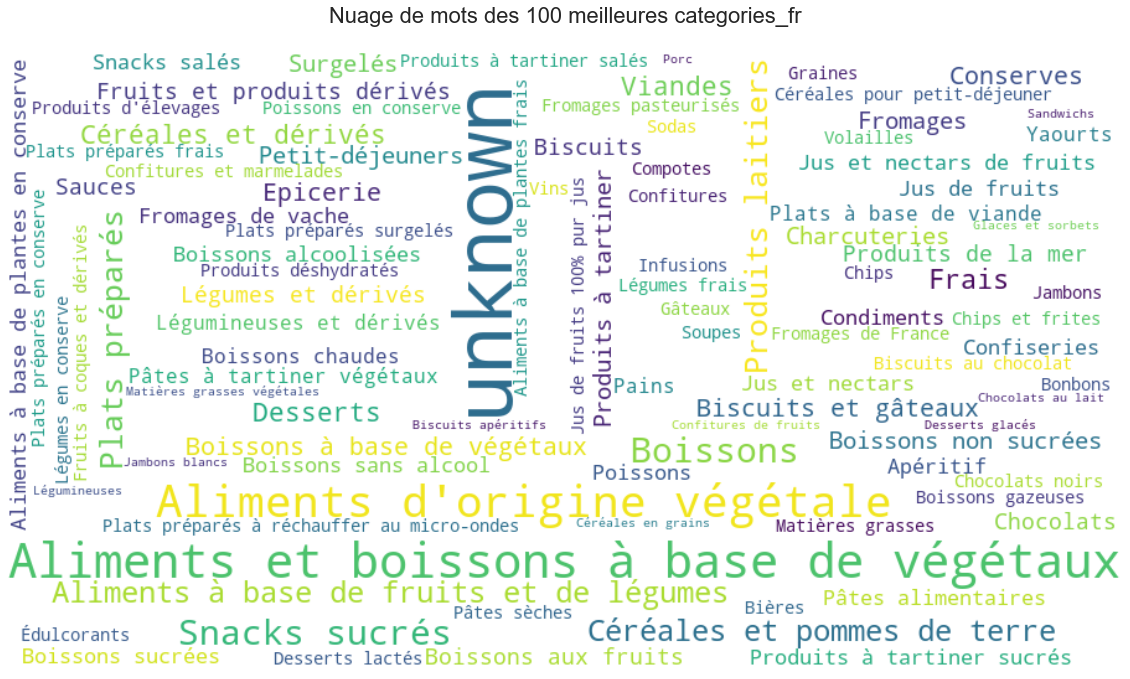

In [94]:
plot_world_cloud(df=food_fr,column="categories_fr",nb_top=100)

In [95]:
pnns_groups_1 = split_words(df = food_fr, column = 'pnns_groups_1')
pnns_groups_2 = split_words(df = food_fr, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

13 catégories sont représentées dans la variable pnns_group_1.
41 catégories sont représentées dans la variable pnns_group_2.


In [96]:
pnns_groups_1

['Beverages',
 'Milk and dairy products',
 'Fish Meat Eggs',
 'Composite foods',
 'sugary-snacks',
 'cereals-and-potatoes',
 'Fruits and vegetables',
 'Sugary snacks',
 'Cereals and potatoes',
 'Salty snacks',
 'Fat and sauces',
 'fruits-and-vegetables',
 'unknown']



On voit ici que certaines catégories sont présentes plusieurs fois mais orthographiées différement :

    'Cereals and potatoes' et 'cereals-and-potatoes'
    'fruits-and-vegetables' et 'Fruits and vegetables'
    ...

Nous allons donc corriger le problème en passant le texte en miniscule et en remplaçant les caractères spéciaux par un espace :


In [97]:
food_fr["pnns_groups_1"] = food_fr["pnns_groups_1"].str.lower().str.replace('-', ' ')

In [98]:
pnns_groups_1 = split_words(df = food_fr, column = 'pnns_groups_1')
print("{} catégories sont représentées dans la variable pnns_group_1.".format(len(pnns_groups_1)))
print(pnns_groups_1)


10 catégories sont représentées dans la variable pnns_group_1.
['beverages', 'milk and dairy products', 'cereals and potatoes', 'composite foods', 'unknown', 'fat and sauces', 'fish meat eggs', 'fruits and vegetables', 'sugary snacks', 'salty snacks']


In [99]:
food_fr["pnns_groups_2"] = food_fr["pnns_groups_2"].str.lower().str.replace('-', ' ').replace('pizza pies and quiche','pizza pies and quiches')
pnns_groups_2 = split_words(df = food_fr, column = 'pnns_groups_2')
print("{} catégories sont représentées dans la variable pnns_group_2.".format(len(pnns_groups_2)))

37 catégories sont représentées dans la variable pnns_group_2.


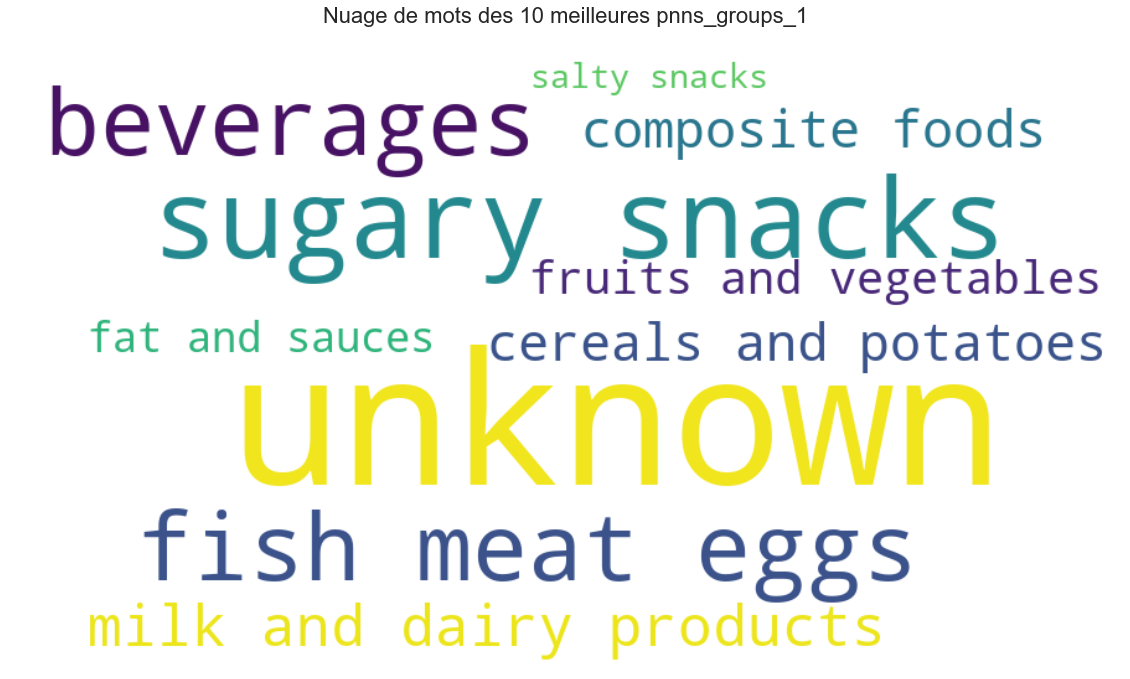

In [100]:
plot_world_cloud(df=food_fr,column="pnns_groups_1",nb_top=10)

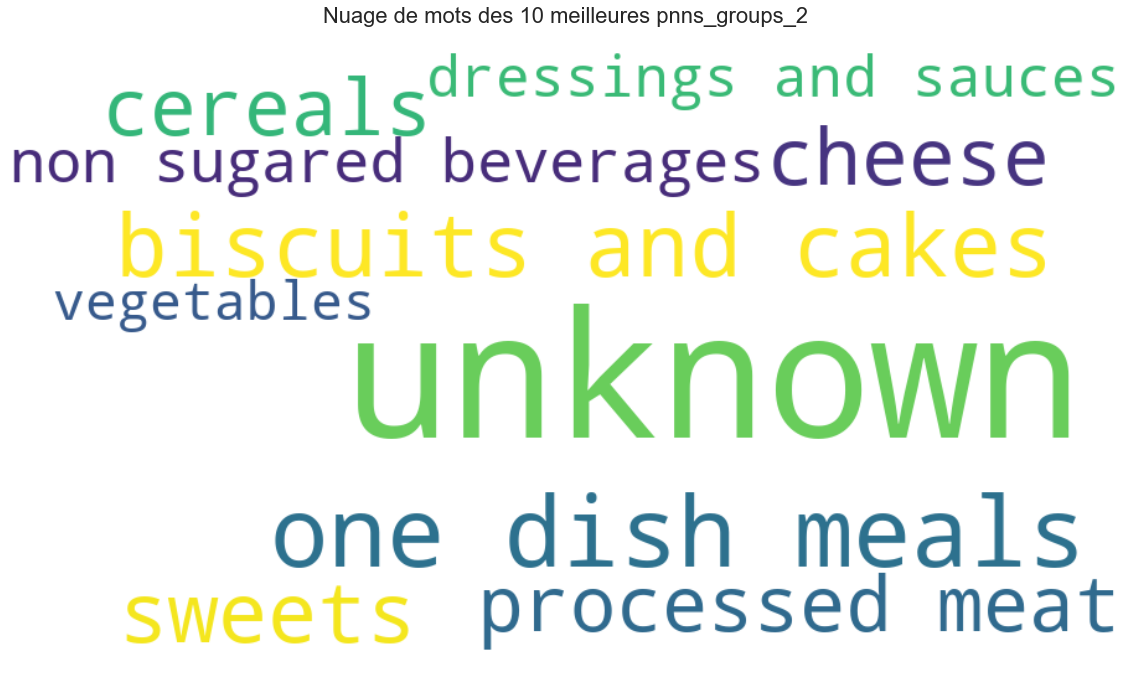

In [101]:
plot_world_cloud(df=food_fr,column="pnns_groups_2",nb_top=10)

# Compléter les valeurs manquantes 

Le jeu de données est nettoyé mais comme le montre les informations ci-dessus, il reste un grand nombre de valeurs manquantes qu'il va falloir compléter mais également des outliers à identifier.

Regardons dans un premier temps une rapide description du Dataset :

In [102]:
food_fr.describe()

additives_n  ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g     salt_100g  nutrition-score-fr_100g
count  53466.000000                             53466.000000  6.459300e+04  47642.000000        62375.000000        47211.000000  62515.000000  45723.000000   64318.000000  62574.000000             61415.000000
mean       1.856619                                 0.148281  1.171553e+03     13.332232            5.423696           27.759277     13.432792      2.559271       7.754531      1.160535                 8.683204
std        2.561405                                 0.450784  1.283590e+04     16.926708            8.531083           27.413340     19.087618      4.634788       7.887373      4.309815                 9.046131
min        0.000000                                 0.000000  0.000000e+00      0.000000            0.000000            0.000000     -0.100000      0.000000       0.000000      0.000000               -15.000000
25%        0.000000                                 0.000000  4.270000e+02      1.300000            0.300000            4.000000      1.000000      0.000000       1.800000      0.080000                 1.000000
50%        1.000000                                 0.000000  1.035000e+03      6.800000            2.000000           14.500000      4.100000      1.380000       6.000000      0.558800                 9.000000
75%        3.000000                                 0.000000  1.649000e+03     21.000000            7.400000           53.000000     17.800000      3.200000      11.000000      1.244600                15.000000
max       31.000000                                 5.000000  3.251373e+06    380.000000          210.000000          190.000000    105.000000    178.000000     100.000000    211.000000                40.000000

Nous allons supprimer tous les produits qui n'ont ni nom, ni catégorie et qui ne pourront donc être clairement identifiés.

In [103]:
datas_cleaned = food_fr[~((food_fr.product_name.isnull()) 
                        & ((food_fr.pnns_groups_1 == "unknown") 
                           | (food_fr.main_category_fr == "unknown")))]

In [104]:
datas_cleaned[((datas_cleaned.pnns_groups_1 == "unknown") & (datas_cleaned.main_category_fr == "unknown") &
              (datas_cleaned.pnns_groups_2 == "unknown") & (datas_cleaned.categories_fr == "unknown"))].shape[0]

29774



Il reste tout de même 29774 produits qui ne contiennent aucune indication de catégorie.

Afin de pouvoir calculer des indicateurs empiriques correctes, nous allons remplacer par des valeurs nulles tous les max et min aberrants (0, -1 ou 999999...) :


In [105]:
#On repère les numerical_features
numerical_features = list(datas_cleaned.select_dtypes(include=["float64","int64"]).columns)

In [106]:
numerical_features

['additives_n',
 'ingredients_that_may_be_from_palm_oil_n',
 'energy_100g',
 'fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'nutrition-score-fr_100g']

In [107]:
#On supprime les nutriscores qui eux peuvent être négatifs
numerical_features.remove('nutrition-score-fr_100g')

In [108]:
#On supprime les lignes dont toutes les numerical_features sont à 0 ou nulles
datas_cleaned = datas_cleaned.loc[~((datas_cleaned[numerical_features]==0) | (datas_cleaned[numerical_features].isnull())).all(axis=1)]

In [109]:
#On supprime les lignes contenant des valeurs négatives et des max aberrants
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features] < 0).any(axis=1)]
datas_cleaned = datas_cleaned[~(datas_cleaned[numerical_features].isin([999999,9999999])).any(axis=1)]

Les variables suffixées avec _100g nous indiquent la quantité de nutriment pour 100 grammes de produit. Les valeurs renseignées ne peuvent donc logiquement pas excéder 100. Nous allons donc supprimer les lignes dont au moins 1 des variables de nutriments est supérieur au seuil :

In [110]:
g_per_100g_features = ['proteins_100g','fat_100g','carbohydrates_100g','sugars_100g','salt_100g',
                       'salt_100g','saturated-fat_100g','fiber_100g']
datas_cleaned = datas_cleaned[~(datas_cleaned[g_per_100g_features] > 100).any(axis=1)]



D'autre part, les valeurs de saturated-fat_100g ne peuvent pas être supérieurs à fat_100g, de même pour les valeurs de sodium_100g qui ne peuvent pas être supérieurs à salt_100g.
Nous allons donc supprimer les lignes qui remplissent ces conditions :


In [111]:
datas_cleaned.columns

Index(['code', 'url', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'quantity', 'packaging', 'brands', 'categories_fr', 'countries_fr', 'ingredients_text', 'serving_size', 'additives_n', 'additives_fr', 'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'states_fr', 'main_category_fr', 'image_url', 'image_small_url', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'], dtype='object')

In [112]:
datas_cleaned = datas_cleaned[~((datas_cleaned['saturated-fat_100g'] > datas_cleaned['fat_100g']) 
                                )]



Enfin, les densité d'energie maximales pour 100g sont de 3700 kJ/100g (source Wikipedia). Nous allons donc supprimer toutes les lignes dont la variable energy_100g est supérieur à 3700 (ou 900 kcal/100g).


In [113]:
datas_cleaned = datas_cleaned[~((datas_cleaned['energy_100g'] > 3700) 
                               )]



Pour les variables restantes, nous allons nous baser sur la médiane et l'écart-type pour éliminer les outliers. Commençons par afficher la dispersion des données et ces métriques :


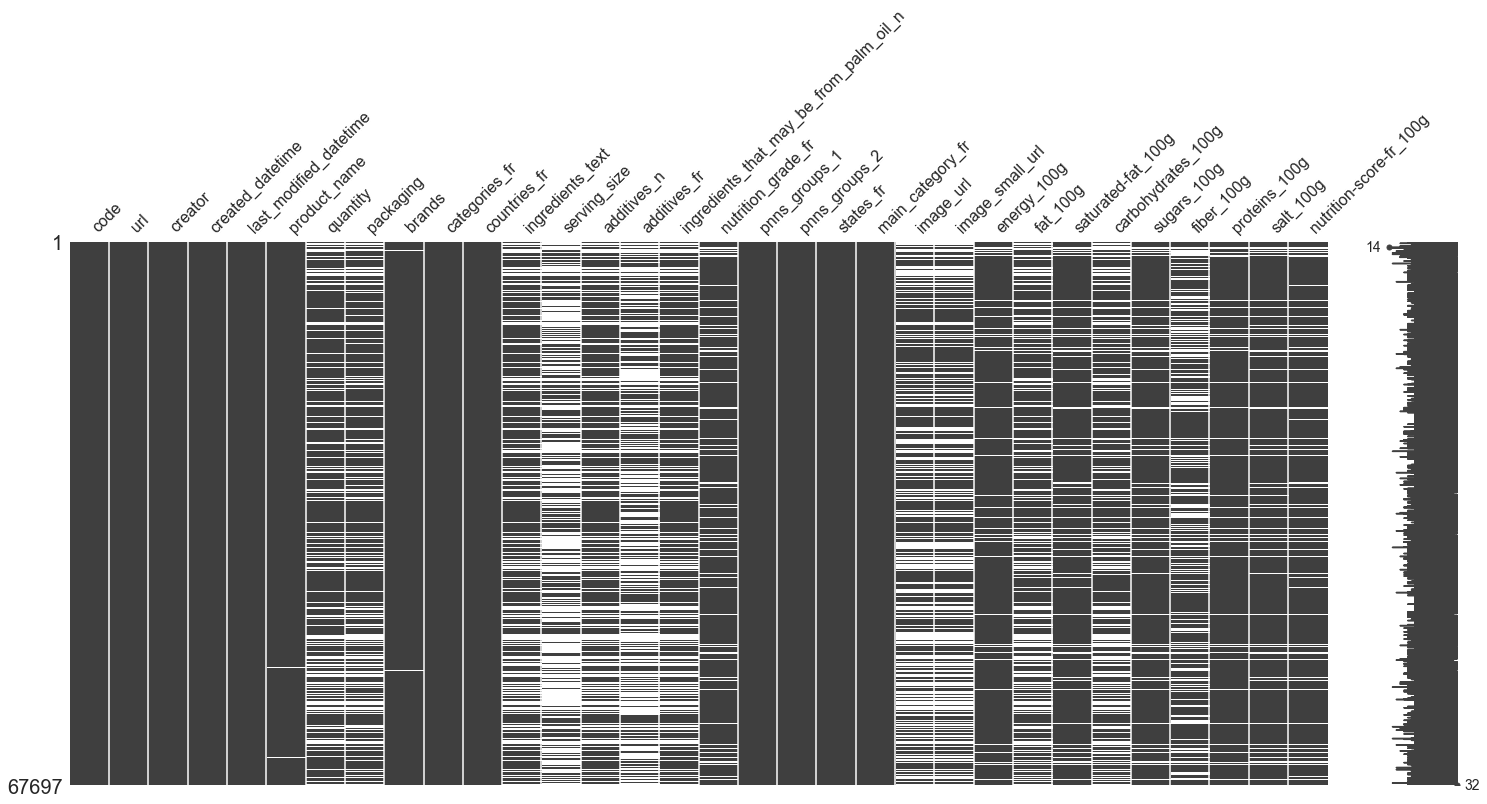

In [114]:
msno.matrix(datas_cleaned)

In [115]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

newdf = datas_cleaned.select_dtypes(include=numerics)

In [116]:
newdf.columns

Index(['additives_n', 'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g'], dtype='object')

In [117]:
sigma_features = ['additives_n','ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g']

In [118]:
#On initialise l'écart-type et la médiane
sigma = [0 for _ in range(len(sigma_features))]
median = [0 for _ in range(len(sigma_features))]
#Puis on complètes les valeurs avec le dataset sans les valeurs nulles
for i in range(len(sigma_features)):
  median[i] = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]].median()
  serie = datas_cleaned[pd.notnull(datas_cleaned[sigma_features[i]])][sigma_features[i]]
  serie = serie.sort_values()
  sigma[i] = np.std(serie[:-25])

In [119]:
for i in range(len(sigma_features)):
    col = sigma_features[i]
    threshold = (median[i] + 3*sigma[i])
    print('{:30}: suppression de la ligne si valeur > {}'.format(col, round(threshold,3)))
    mask = datas_cleaned[col] > threshold
    datas_cleaned = datas_cleaned.drop(datas_cleaned[mask].index)

additives_n                   : suppression de la ligne si valeur > 8.766
ingredients_that_may_be_from_palm_oil_n: suppression de la ligne si valeur > 1.398
energy_100g                   : suppression de la ligne si valeur > 3312.958
fat_100g                      : suppression de la ligne si valeur > 56.247
saturated-fat_100g            : suppression de la ligne si valeur > 26.424
carbohydrates_100g            : suppression de la ligne si valeur > 96.488
sugars_100g                   : suppression de la ligne si valeur > 61.055
fiber_100g                    : suppression de la ligne si valeur > 13.727
proteins_100g                 : suppression de la ligne si valeur > 29.154
salt_100g                     : suppression de la ligne si valeur > 11.67


In [120]:
datas_cleaned.shape

(59033, 32)

In [121]:
datas_cleaned.describe()

additives_n  ingredients_that_may_be_from_palm_oil_n   energy_100g      fat_100g  saturated-fat_100g  carbohydrates_100g   sugars_100g    fiber_100g  proteins_100g     salt_100g  nutrition-score-fr_100g
count  41093.000000                             41093.000000  55481.000000  40957.000000        53526.000000        40577.000000  53636.000000  39561.000000   55253.000000  53703.000000             52804.000000
mean       1.748132                                 0.099895   1021.527368     11.429023            4.657064           26.263475     11.395112      2.168789       7.655407      0.861630                 7.964075
std        1.993328                                 0.299864    714.376025     12.426081            6.189557           26.205556     15.247692      2.581949       6.849660      1.112295                 8.983483
min        0.000000                                 0.000000      0.000000      0.000000            0.000000            0.000000      0.000000      0.000000       0.000000      0.000000               -14.000000
25%        0.000000                                 0.000000    382.000000      1.300000            0.300000            4.100000      1.000000      0.000000       2.200000      0.100000                 1.000000
50%        1.000000                                 0.000000    908.000000      6.200000            1.800000           13.300000      3.900000      1.400000       6.100000      0.600000                 6.000000
75%        3.000000                                 0.000000   1582.000000     20.000000            6.700000           52.000000     15.000000      3.100000      11.000000      1.202505                15.000000
max        8.000000                                 1.000000   3305.000000     56.200000           26.400000           96.400000     61.000000     13.700000      29.100000     11.607800                40.000000

Après ces quelques opérations de nettoyage, les valeurs médianes, d'écarts-type, de minimum et maximum sont plus cohérentes. Nous allons pouvoir exploiter ces données pour estimer les valeurs manquantes.

Nous allons déjà regarder la distribution de ces variables et définir si elles suivent une loi normale, ce qui nous aidera à prendre une décision pour la méthode d'imputation des valeurs manquantes.

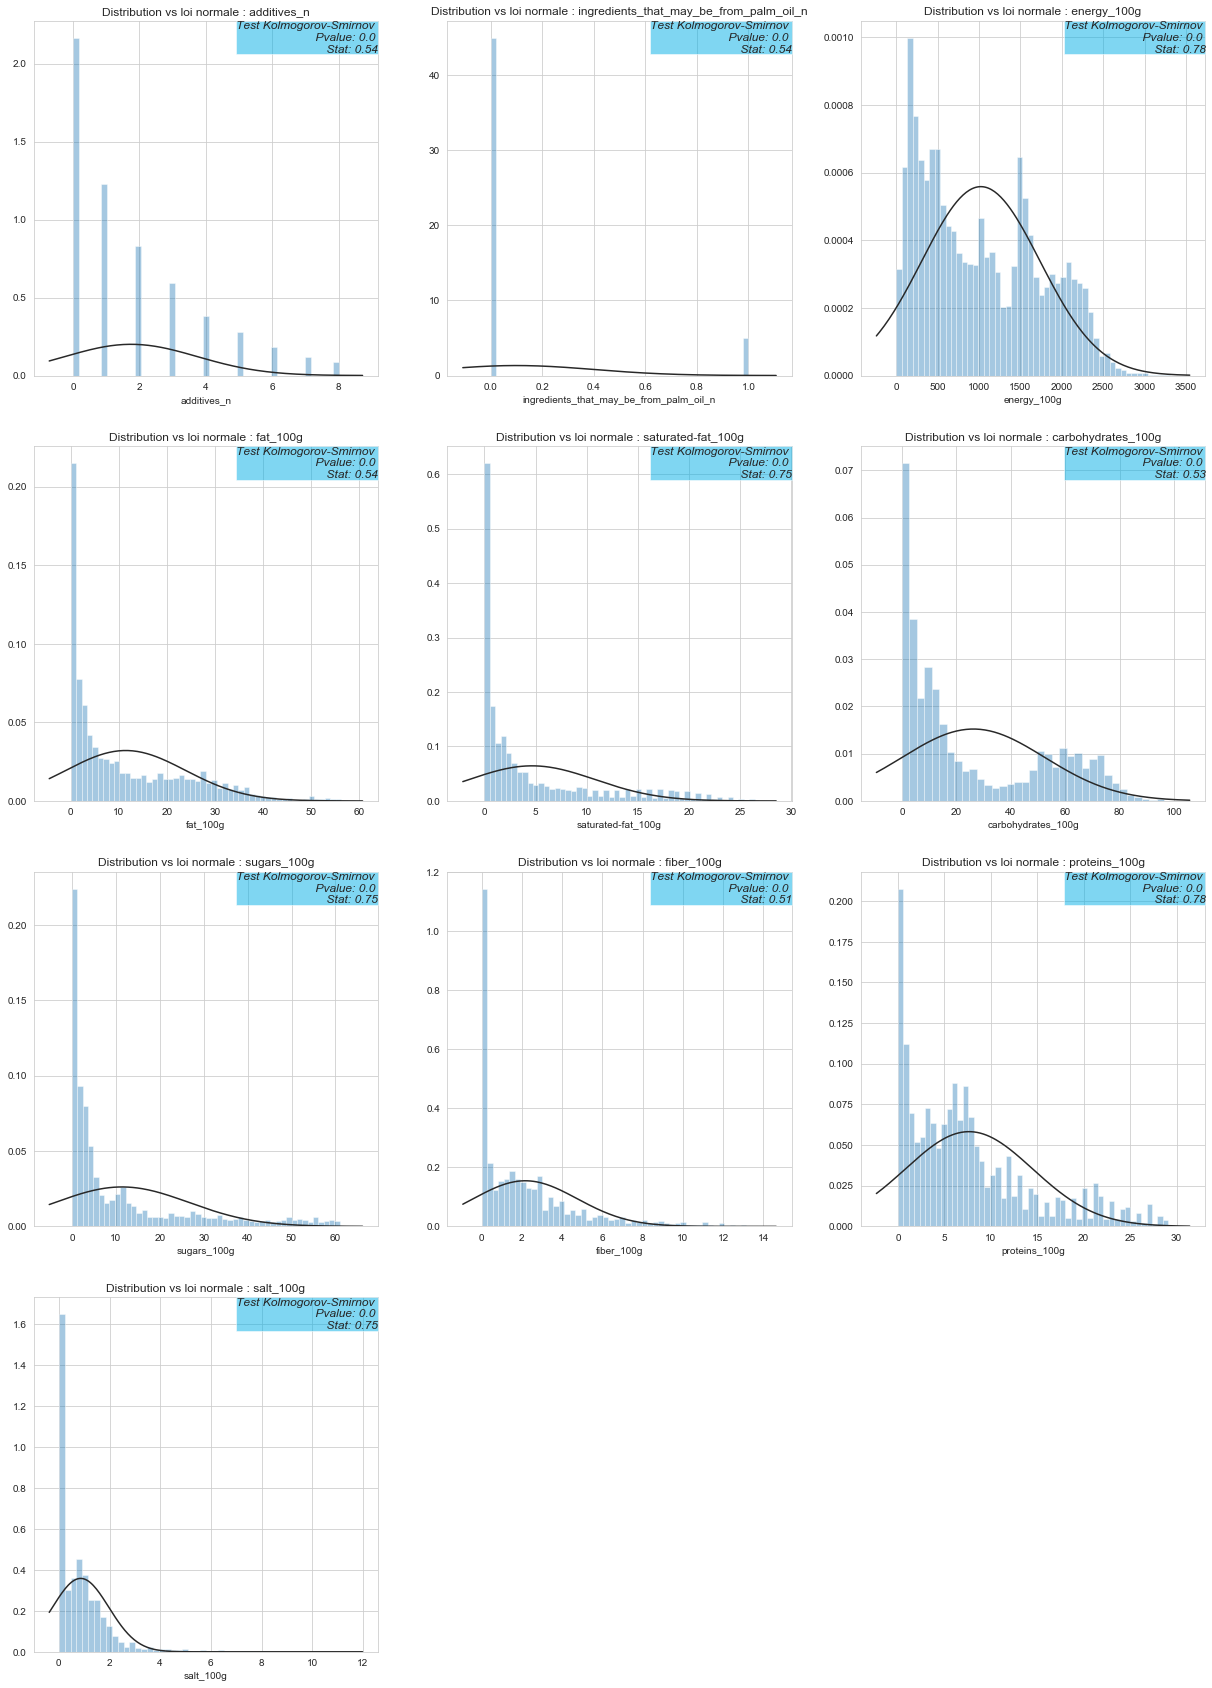

In [122]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,30))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(4,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    sub += 1
plt.show()



En se basant sur les projections obtenus et les résultats des tests de Kolmogorov-Smirnov (Pvalue < au niveau de test de 5%) on rejette donc l'hypothèse de normalité des distributions de ces variables. Il serait donc inexacte d'imputer les valeurs manquantes par la moyenne.

Pour confirmer cette approche, regardons à présent quelque unes de ces distributions en fonction de la catégorie pnns_groups_1 :


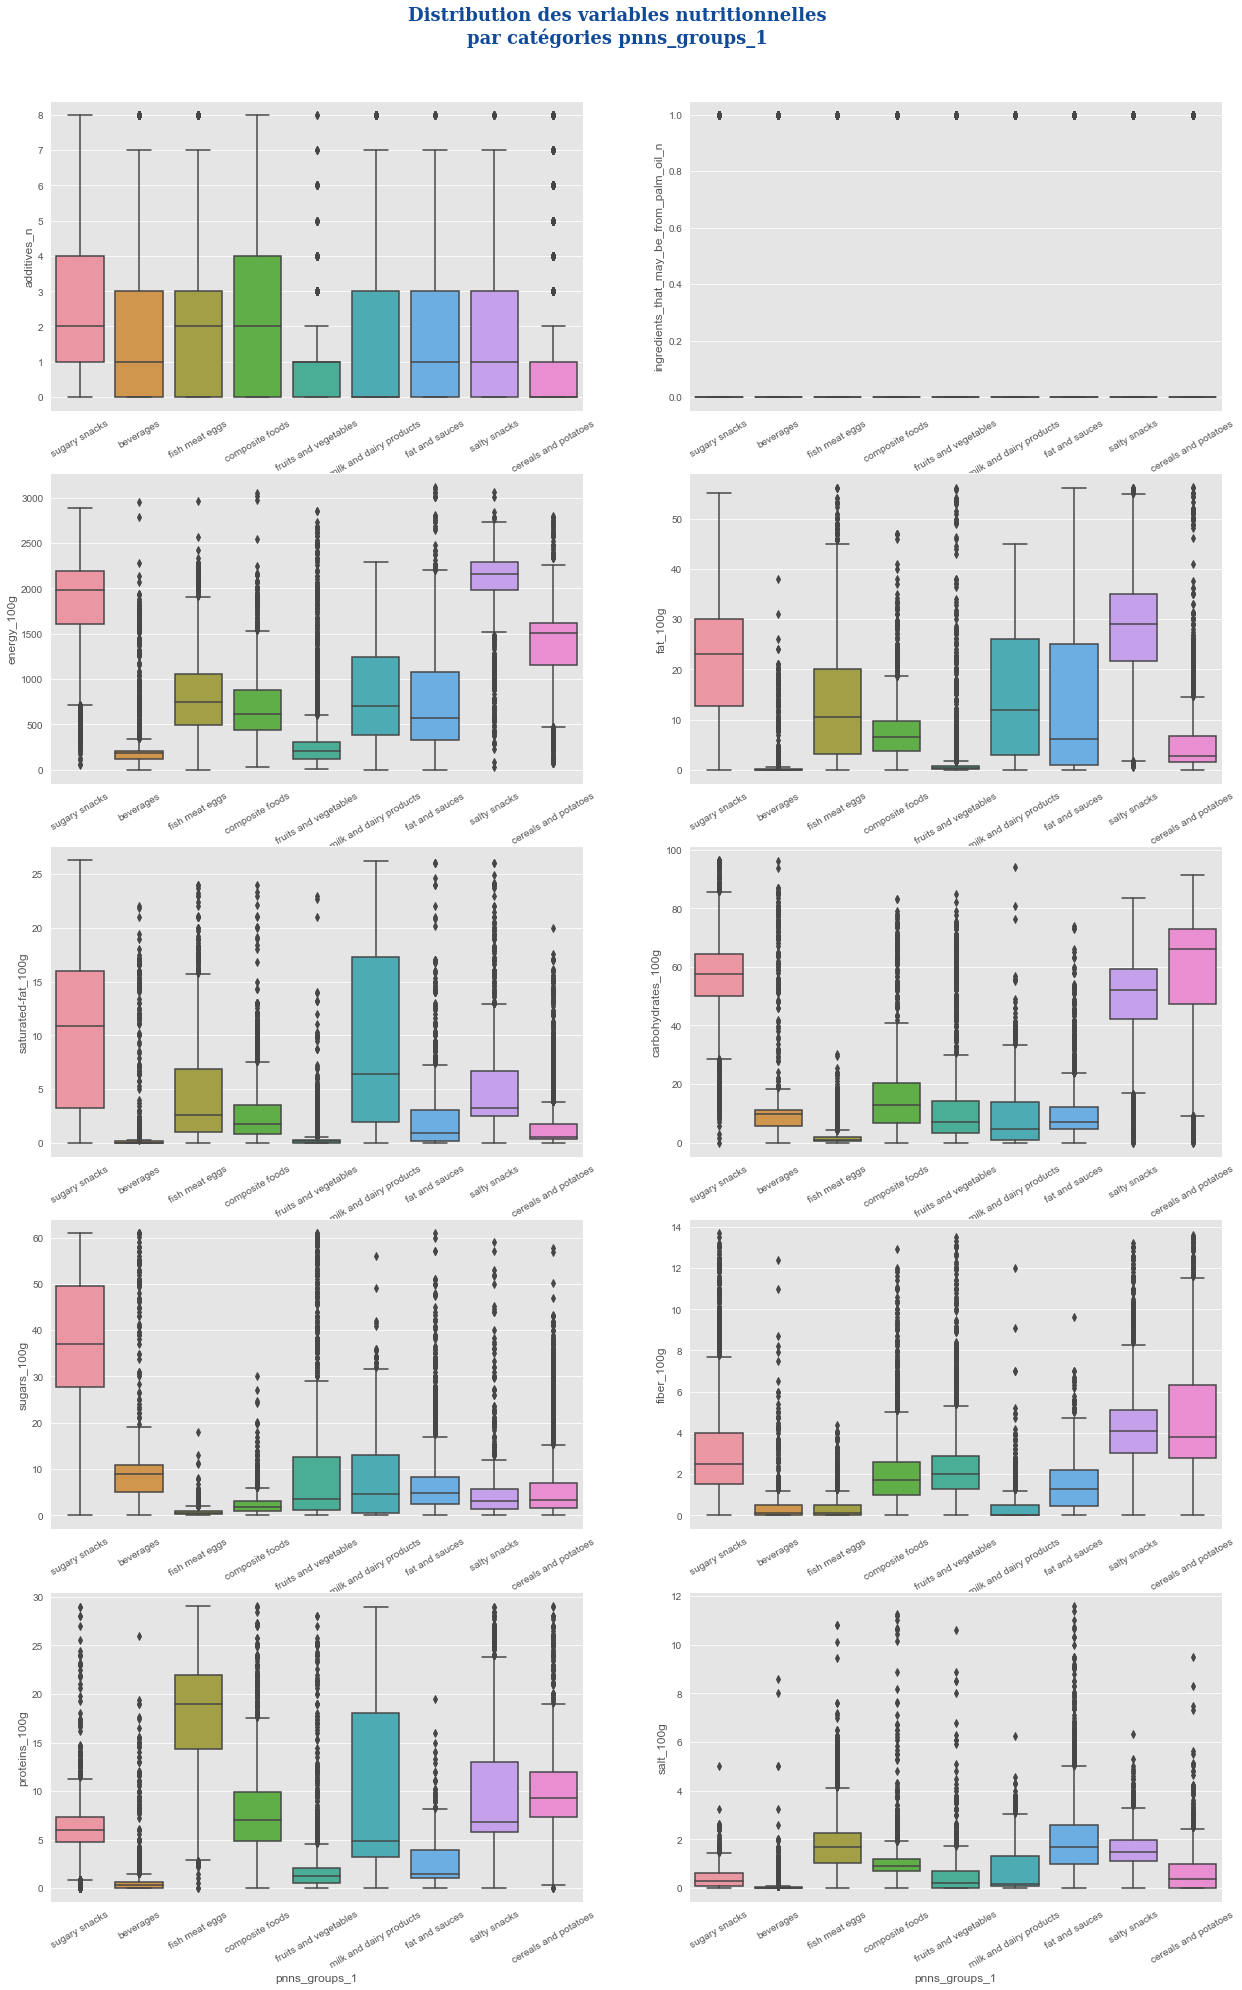

In [123]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(6,2,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(x="pnns_groups_1", y=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_1"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_1", ha="center", 
         fontdict=font_title)
plt.show()

Si l'on regarde la distribution de quelques unes de ces mêmes variables sur la catégorie pnns_groups_2 :

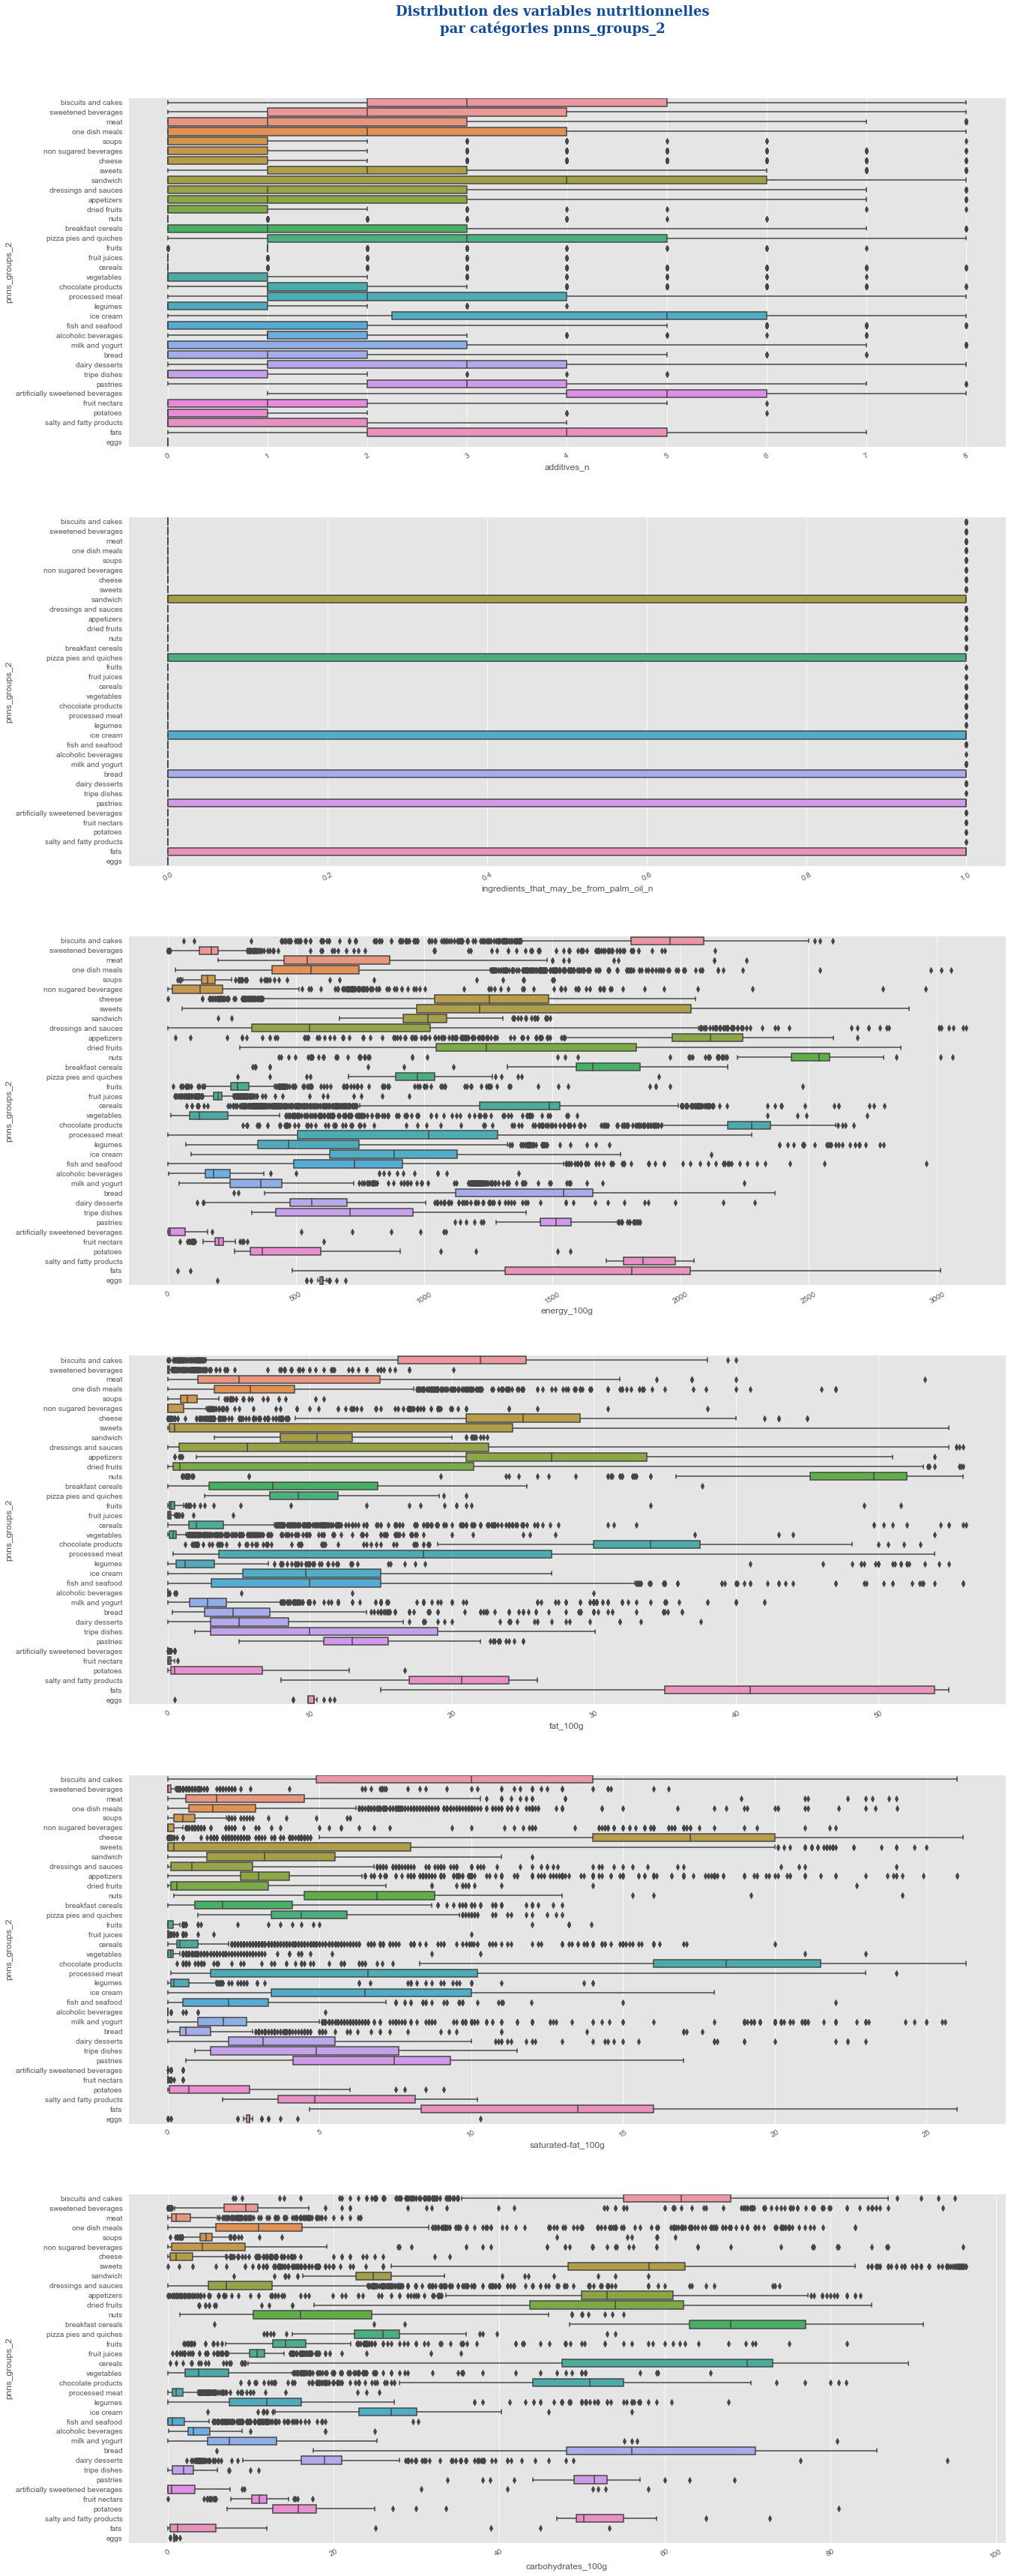

In [124]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(21,60))

sub = 0
for i in range(len(numerical_features[:6])):
    fig.add_subplot(6,1,i+1)
    colonne = numerical_features[i]
    ax = sns.boxplot(y="pnns_groups_2", x=colonne, data=datas_cleaned[datas_cleaned["pnns_groups_2"]!="unknown"])
    for tick in ax.get_xticklabels():
        tick.set_rotation(30)
    sub += 1

fig.text(0.5, 0.90, r"Distribution des variables nutritionnelles" "\n" "par catégories pnns_groups_2", ha="center", 
         fontdict=font_title)
plt.show()

In [125]:
datas_cleaned['pnns_groups_1']

106                    unknown
138                    unknown
184              sugary snacks
189                    unknown
191                    unknown
                  ...         
320740                 unknown
320741                 unknown
320751    cereals and potatoes
320757                 unknown
320763               beverages
Name: pnns_groups_1, Length: 59033, dtype: object

In [126]:
datas_cleaned[numerical_features].isnull().sum()

additives_n                                17940
ingredients_that_may_be_from_palm_oil_n    17940
energy_100g                                 3552
fat_100g                                   18076
saturated-fat_100g                          5507
carbohydrates_100g                         18456
sugars_100g                                 5397
fiber_100g                                 19472
proteins_100g                               3780
salt_100g                                   5330
dtype: int64

Nous allons donc compléter les valeurs nulles par la médiane de la catégorie pnns_groups_2.
Enfin, pour les autres variables, avec peu de null et dont les distributions ne suivent pas la loi gaussiene, nous allons imputer avec l'algorithme des K Nearest Neighbours (KNN).

In [127]:
# KNN pour les autres variables
from sklearn.impute import KNNImputer

# On entraine le modèle d'imputation sur un échantillon de données
knn_features = ['energy_100g', 'fat_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g', 'salt_100g']
sample_datas = datas_cleaned[knn_features].sample(frac=0.25, random_state=1)
imputer = KNNImputer(n_neighbors=5, missing_values=np.nan)
imputer.fit(sample_datas)

KNNImputer()

In [128]:
# Puis on applique le modèle sur l'ensemble des données
datas_imputed = imputer.transform(datas_cleaned[knn_features])
df_datas_imputed = pd.DataFrame(datas_imputed, columns=knn_features)

In [129]:
for col_knn in knn_features:
    datas_cleaned[col_knn] = df_datas_imputed[col_knn].values

In [130]:
# On complète les variables restantes avec la médiane du groupe pnns 2
for col in ['additives_n', 'ingredients_that_may_be_from_palm_oil_n','carbohydrates_100g','fiber_100g']:
    datas_cleaned[col] = datas_cleaned.groupby('pnns_groups_2')[col].transform(lambda x: x.fillna(x.median()))




Les valeurs manquantes étant à présent toutes complétées pour ces variables numériques, nous allons vérifier que les distributions n'ont pas changées :


ValueError: num must be 1 <= num <= 9, not 10

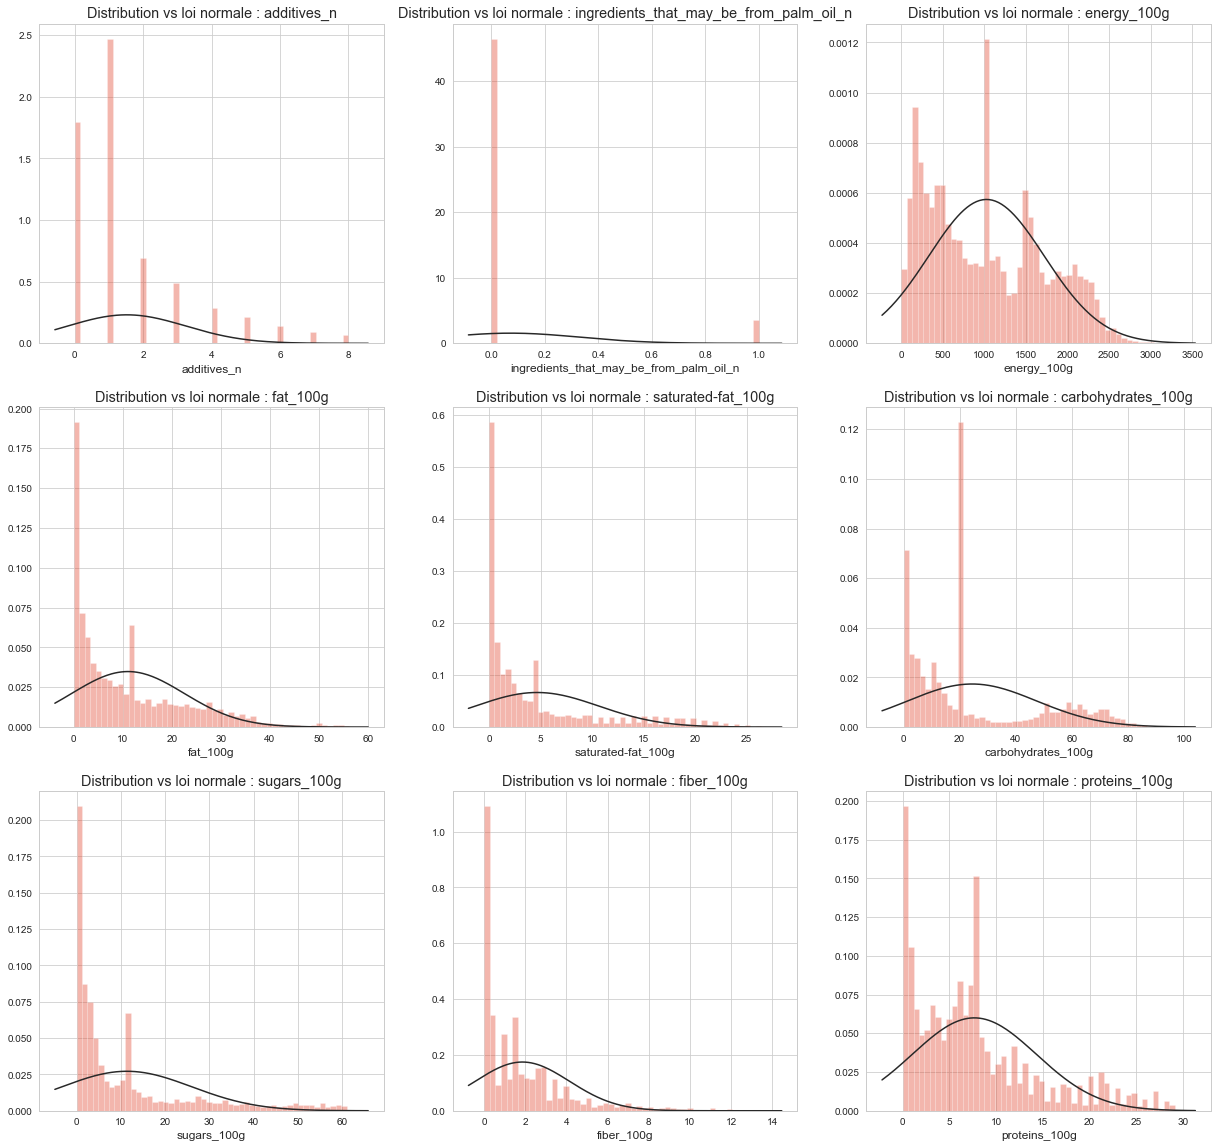

In [131]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

sub = 0
for i in range(len(numerical_features)):
    fig.add_subplot(3,3,i+1)
    colonne = numerical_features[i]
    kstest = stats.kstest(datas_cleaned[colonne].notnull(),'norm')
    ax = sns.distplot(datas_cleaned[colonne], fit=stats.norm, kde=False)
    ax.set_title("Distribution vs loi normale : {}".format(colonne))
    sub += 1
plt.show()


In [ ]:
datas_cleaned.describe()

In [ ]:
datas_cleaned['carbohydrates_100g'].hist()

In [ ]:
msno.matrix(datas_cleaned)

In [ ]:
datas_cleaned.isnull().sum()

# Calcul des Nutri-Scores manquants

Une des variables primoridale de ce jeu de données est le Nutriscore. Or, cette variable compte beaucoup de manquants. Afin de calculer ce nutriscore, nous avons besoin de plusieurs autres variables.

Le score prend en compte pour 100g de produit, la teneur :

    En nutriments et aliments à favoriser (fibres, protéines, fruits et légumes),
    En nutriments à limiter (énergie, acide gras saturés, sucres, sel).

Après calcul, le score obtenu par un produit permet de lui attribuer une lettre et une couleur. Voici un tableau simplifié permettant de calculer l'attribution des points :

Nous allons donc isoler les variables nécessaires au calcul du Nutriscore et vérifier leur taux de remplissage :

In [ ]:
nutriscore_features = ['pnns_groups_1', 'pnns_groups_2', 'nutrition-score-fr_100g','nutrition_grade_fr',
                       'energy_100g','sugars_100g','saturated-fat_100g','salt_100g', 'fiber_100g', 'proteins_100g']
datas_cleaned[nutriscore_features].sample(10)

La variable indiquant la proportion de fruit/légumes des produits a été supprimée car très peu renseignée. Nous allons donc tenter de l'estimer en fonction de la catégorie :

In [ ]:
datas_cleaned.pnns_groups_2.unique()

In [ ]:
high_rate_fruit = ['fruit juices','dried fruits','legumes','vegetables','fruits', 'soups','potatoes','fruit nectars']

medium_rate_fruit = ['unknown', 'sweetened beverages', 'dressings and sauces', 'ice cream', 'pastries', 'dairy desserts',
                     'pizza pies and quiche', 'pizza pies and quiches']

low_rate_fruit = ['waters and flavored waters','chocolate products', 'fish and seafood', 'salty and fatty products', 
                  'cheese', 'cereals', 'appetizers', 'one dish meals', 'bread', 'fats', 'plant based milk substitutes',
                  'alcoholic beverages', 'processed meat', 'breakfast cereals', 'meat', 'eggs', 'sandwiches',
                  'offals', 'teas and herbal teas and coffees', 'biscuits and cakes', 'sweets', 'milk and yogurt',
                  'artificially sweetened beverages', 'unsweetened beverages','nuts']

In [ ]:
datas_cleaned['fruits-vegetables-rate_100g'] = [81 if cat in high_rate_fruit else 45 if cat in medium_rate_fruit else 25 for cat in datas_cleaned.pnns_groups_2]



A présent, nous allons définir la fonction de calcul du Nutriscore et l'appliquer à notre dataset :


In [ ]:
def calc_globalscore(row):
    #Energy
    if row["energy_100g"] <= 335:
        a = 0
    elif ((row["energy_100g"] > 335) & (row["energy_100g"] <= 1675)):
        a = 5
    else:
        a = 10 
    #Sugar
    if row["sugars_100g"] <= 4.5:
        b = 0
    elif ((row["sugars_100g"] > 4.5) & (row["sugars_100g"] <= 22.5)):
        b = 5
    else:
        b = 10
    #saturated-fat
    if row["saturated-fat_100g"] <= 1:
        c = 0
    elif ((row["saturated-fat_100g"] > 1) & (row["saturated-fat_100g"] <= 5)):
        c = 5
    else:
        c = 10
    #salt
    if (row["salt_100g"]/1000) <= 90:
        d = 0
    elif (((row["salt_100g"]/1000) > 90) & ((row["salt_100g"]/1000) <= 450)):
        d = 5
    else:
        d = 10
    #fruits-vegetables-rate
    if row["fruits-vegetables-rate_100g"] <= 40:
        e = 0
    elif ((row["fruits-vegetables-rate_100g"] > 40) & (row["fruits-vegetables-rate_100g"] <= 80)):
        e = -2
    else:
        e = -5
    #fiber
    if row["fiber_100g"] <= 0.7:
        f = 0
    elif ((row["fiber_100g"] > 0.7) & (row["fiber_100g"] <= 3.5)):
        f = -2
    else:
        f = -5
    #proteins
    if row["proteins_100g"] <= 1.6:
        g = 0
    elif ((row["proteins_100g"] > 1.6) & (row["proteins_100g"] <= 8)):
        g = -2
    else:
        g = -5
    
    #Global_score
    global_score = a+b+c+d+e+f+g
    
    return global_score

In [ ]:
#Nutriscore
def calc_nutriscore(row):
    if row["calc_global_score"] < 0 :
        nutriscore = "a"
    elif ((row["calc_global_score"] >= 0) & (row["calc_global_score"] < 5)) :
        nutriscore = "b"
    elif ((row["calc_global_score"] >= 5) & (row["calc_global_score"] < 10)) :
        nutriscore = "c"
    elif ((row["calc_global_score"] >= 10) & (row["calc_global_score"] < 20)) :
        nutriscore = "d"
    else:
        nutriscore = "e"
        
    return nutriscore

In [ ]:
datas_cleaned['calc_global_score'] = datas_cleaned.apply(lambda row: calc_globalscore(row),axis=1)
datas_cleaned['calc_nutriscore'] = datas_cleaned.apply(lambda row: calc_nutriscore(row),axis=1)

In [ ]:
nutriscore_features.append('calc_global_score')
nutriscore_features.append('calc_nutriscore')

In [ ]:
datas_cleaned[nutriscore_features].sample(10)



Nous devons à présent vérifier les erreurs d'imputation sur les scores déjà connus, ce qui nous permettra de voir si les calculs sont satisfaisants et utilisables :


In [ ]:
df_scores = datas_cleaned[['nutrition-score-fr_100g','nutrition_grade_fr', 'calc_nutriscore', 'calc_global_score']][datas_cleaned['nutrition_grade_fr'].isnull()==False]

from sklearn.metrics import accuracy_score

accuracy_nutrigrade = accuracy_score(df_scores['nutrition_grade_fr'].values, df_scores['calc_nutriscore'].values)
print("L'accuracy_score sur les Nutrigrades calculés est de : {:.2f} %.".format(accuracy_nutrigrade*100))



La précision du calul est donc inférieure à 50%. Ces calculs ne peuvent donc pas être utilisés pour compléter nos données. Notre application aura donc pour but d'éstimer le nutrigrade d'un produit en fonction de ses caractéristiques connues, comme la catégorie, sa teneur en nutriments ... grâce à des algorithmes simples de Machine Learning.


In [ ]:
datas_cleaned.info()


In [ ]:
#datas_cleaned.set_index("code").to_csv("cleaned_openfoodfacts.csv", sep='\t')
